<a href="https://colab.research.google.com/github/taraf10s/Data-mining-project/blob/main/Reports/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Diabetes Data Analysis

## 1.Problem



Recently, the prevalence of diabetes has been on the rise, becoming increasingly common across all demographics. This condition leads to numerous serious health complications, including cardiovascular issues, kidney damage, and vision impairment, which can significantly impact quality of life and, in severe cases, result in mortality [1][2]. In our project, we aim to study and analyze patients’ medical and laboratory data to identify potential factors and risks associated with diabetes. By doing so, we can assist individuals in understanding their likelihood of developing diabetes and encourage preventive measures to reduce its impact [3].

## 2.Data Mining Task


In our project, we will utilize two data mining techniques, classification and clustering, to predict the likelihood of diabetes. The classification model will be trained to categorize patients as diabetic, non-diabetic, or at risk of developing diabetes (predict-diabetic) using various medical parameters such as blood sugar levels, Body Mass Index (BMI), cholesterol profiles, HBA1C, and creatinine ratio. The clustering technique will group patients with similar medical characteristics into clusters, which can then be used to predict outcomes for new patients by comparing their data to these established clusters.

## 3.Data


 * The source for our dataset:
https://www.kaggle.com/datasets/aravindpcoder/diabetes-datase

*  Data types, numbers of objects and attributes and missing values

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Load the dataset
dataDiabetes= pd.read_csv('Dataset/Original_dataset.csv')
df=pd.DataFrame(dataDiabetes)

In [ ]:
print("Number of objects:", df.shape[0])
print("Number of attributes:", df.shape[1])
print("\nData types and missing values:")
print(df.info())

Number of objects: 1000
Number of attributes: 14

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB
None


* Missing data

an efficient method to check a DataFrame for missing values, identify the columns with missing data, and count the number of missing values in each column. As demonstrated below, our dataset has no missing values.

In [ ]:
missing_values= df.isna().sum() #calculates the number of missing values for each column in the DataFrame
print("The missing data in each column:")
print(missing_values)

The missing data in each column:
ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


*	Attribute characteristics:

Our dataset provides a comprehensive explanation of the attributes along with their respective types. After data preprocessing, the dataset retains 14 columns, each representing distinct features relevant to the analysis. To ensure clarity and facilitate seamless analysis, we define the type of each attribute, offering a clear and structured view of the data.

In [ ]:
from IPython.display import display, HTML

html_content = """
<table style="border:1;">
  <thead>
    <tr>
      <th>No</th>
      <th>Name</th>
      <th>Type</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>ID</td>
      <td>Nominal and Integer</td>
      <td>ID number that distinguishes different samples/data that have been taken from different patients</td>
    </tr>
    <tr>
      <td>2</td>
      <td>No_Patient</td>
      <td>Numeric and Integer</td>
      <td> patient number </td>
    </tr>
    <tr>
      <td>3</td>
      <td>Gender</td>
      <td>Binary </td>
      <td> Gender type </td>
    </tr>
    <tr>
      <td>4</td>
      <td>Age</td>
      <td>Numeric and Integer</td>
      <td>The age of the patient</td>
    </tr>
    <tr>
      <td>5</td>
      <td>Urea</td>
      <td>Numeric and Float</td>
      <td>Urea is a waste product formed in the liver when the body breaks down proteins</td>
    </tr>
    <tr>
      <td>6</td>
      <td>Cr</td>
      <td>Numeric and Integer</td>
      <td> refers to the ratio of creatinine levels in the body</td>
    </tr>
    <tr>
      <td>7</td>
      <td>HbA1c</td>
      <td>Numeric and Float</td>
      <td>The HbA1c (Hemoglobin A1c) attribute represents the average blood glucose (sugar) levels </td>
    </tr>
    <tr>
      <td>8</td>
      <td>Chol</td>
      <td>Numeric and Float</td>
      <td>The Chol attribute refers to the total cholesterol level in the blood </td>
    </tr>
    <tr>
      <td>9</td>
      <td>TG</td>
      <td>Numeric and Float</td>
      <td>The TG attribute measures the level of triglycerides in the blood</td>
    </tr>
    <tr>
      <td>10</td>
      <td>HDL</td>
      <td>Numeric and Float</td>
      <td>The HDL(High-Density Lipoprotein) refers to a type of cholesterol often termed "good cholesterol" because it helps remove excess cholesterol from the bloodstream</td>
    </tr>
    <tr>
      <td>11</td>
      <td>LDL</td>
      <td>Numeric and Float</td>
      <td>The LDL (Low-Density Lipoprotein) attribute refers to a type of cholesterol that is often termed "bad" cholesterol</td>
    </tr>
    <tr>
      <td>12</td>
      <td>VLDL </td>
      <td>Numeric and Float</td>
      <td>VLDL (Very Low-Density Lipoprotein) is a type of lipoprotein produced by the liver</td>
    </tr>
    <tr>
      <td>13</td>
      <td>BMI </td>
      <td>Numeric and Float</td>
      <td>Body Mass Index</td>
    </tr>
     <tr>
      <td>14</td>
      <td>CLASS </td>
      <td>Ordinal</td>
      <td>Class (the patient's diabetes disease class may be Diabetic 'Y', Non-Diabetic 'N", or Predict-Diabetic 'P').</td>
    </tr>

  </tbody>
</table>
"""

# Display the HTML content
display(HTML(html_content))


No,Name,Type,Description
1,ID,Nominal and Integer,ID number that distinguishes different samples/data that have been taken from different patients
2,No_Patient,Numeric and Integer,patient number
3,Gender,Binary,Gender type
4,Age,Numeric and Integer,The age of the patient
5,Urea,Numeric and Float,Urea is a waste product formed in the liver when the body breaks down proteins
6,Cr,Numeric and Integer,refers to the ratio of creatinine levels in the body
7,HbA1c,Numeric and Float,The HbA1c (Hemoglobin A1c) attribute represents the average blood glucose (sugar) levels
8,Chol,Numeric and Float,The Chol attribute refers to the total cholesterol level in the blood
9,TG,Numeric and Float,The TG attribute measures the level of triglycerides in the blood
10,HDL,Numeric and Float,"The HDL(High-Density Lipoprotein) refers to a type of cholesterol often termed ""good cholesterol"" because it helps remove excess cholesterol from the bloodstream"


*  graphical presentation

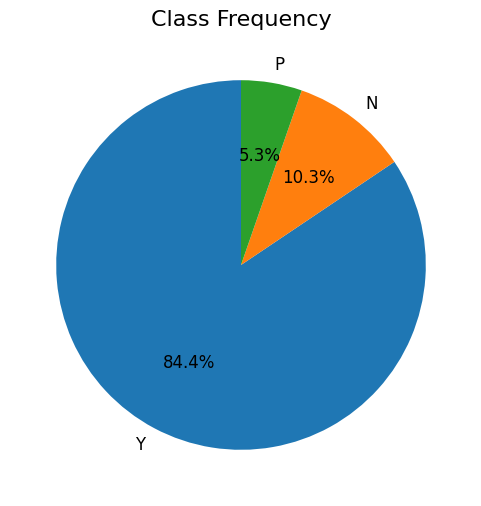

CLASS
Y    84.0
N    10.2
P     5.3
Name: proportion, dtype: float64


In [ ]:
# Calculate the frequency for each class and ensure only the top three are shown
Class_frequency = df['CLASS'].value_counts(normalize=True) * 100
filtered_class_frequency = Class_frequency[:3]  # Select only the top three unique classes

# Plot a pie chart
plt.figure(figsize=(6, 6))  # Adjust figure size
filtered_class_frequency.plot.pie(
    autopct='%1.1f%%',  # Show percentages with one decimal point
    startangle=90,      # Start at 90 degrees
    textprops={'fontsize': 12}  # Increase font size for better readability
)

# Display the plot
plt.title('Class Frequency', fontsize=16)  # Add a title
plt.ylabel('')  # Remove y-axis label
plt.show()

# Print the percentages for the top three classes
print(filtered_class_frequency.round(2))



As shown in the pie chart, we presented the percentage distribution for each category in the class label.

* five number summaray

In [ ]:
# Select numeric attributes
numeric_attributes = df.select_dtypes(include=np.number)

# Calculate the five-number summary
five_num_summary = numeric_attributes.describe().loc[['min', '25%', '50%', '75%', 'max']]

print("Five-number summary for numeric attributes:")
print(five_num_summary)

Five-number summary for numeric attributes:
         ID    No_Pation   AGE  Urea     Cr  HbA1c  Chol    TG  HDL  LDL  \
min    1.00       123.00  20.0   0.5    6.0    0.9   0.0   0.3  0.2  0.3   
25%  125.75     24063.75  51.0   3.7   48.0    6.5   4.0   1.5  0.9  1.8   
50%  300.50     34395.50  55.0   4.6   60.0    8.0   4.8   2.0  1.1  2.5   
75%  550.25     45384.25  59.0   5.7   73.0   10.2   5.6   2.9  1.3  3.3   
max  800.00  75435657.00  79.0  38.9  800.0   16.0  10.3  13.8  9.9  9.9   

     VLDL    BMI  
min   0.1  19.00  
25%   0.7  26.00  
50%   0.9  30.00  
75%   1.5  33.00  
max  35.0  47.75  


*	Outliers

In [ ]:
# Detect outliers
Q1 = numeric_attributes.quantile(0.25)
Q3 = numeric_attributes.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_attributes < (Q1 - 1.5 * IQR)) | (numeric_attributes > (Q3 + 1.5 * IQR))).any()

print("\nOutliers:")
print(outliers)


Outliers:
ID           False
No_Pation     True
AGE           True
Urea          True
Cr            True
HbA1c         True
Chol          True
TG            True
HDL           True
LDL           True
VLDL          True
BMI           True
dtype: bool


the attributes with output True, indicating that these attributes have outliers, while the attributes with output False, indicating that these attributes do not have outliers. so all the attributes have outliers except 'ID'

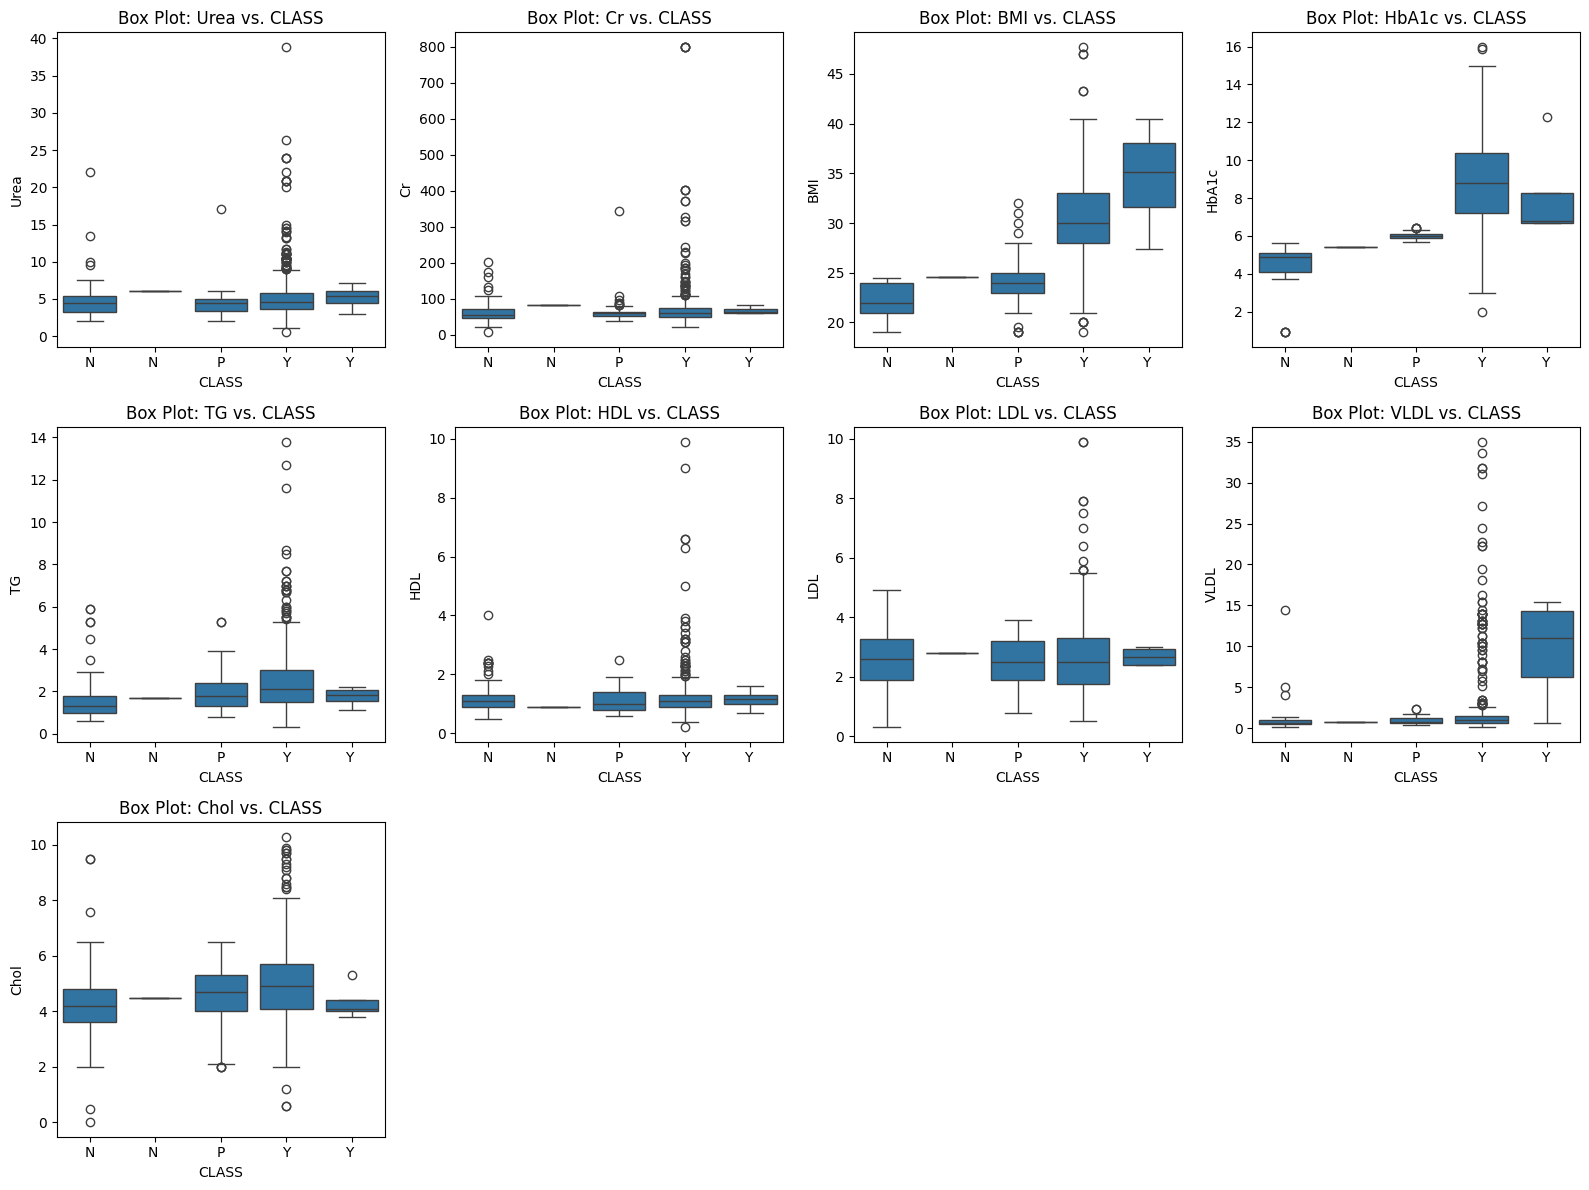

In [ ]:
%pip install seaborn
import seaborn as sns

target_column= 'CLASS'

# choosing the numiric data only
numeric_columns = ['Urea', 'Cr', 'BMI', 'HbA1c', 'TG', 'HDL', 'LDL', 'VLDL', 'Chol']

# Determine the number of rows and columns for the subplot layout
num_features = len(numeric_columns)
num_rows = (num_features - 1) // 4 + 1
num_cols = min(4, num_features)

# Create box plots for each feature grouped by 'Class'
plt.figure(figsize=(16, 4 * num_rows))

for i, feature in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=target_column, y=feature, data=df)
    plt.title(f'Box Plot: {feature} vs. {target_column}')
    plt.xlabel(target_column)
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

We used a box plots graph to visualize the distribution of numeric features across different classes in the target column,, providing insights into variability and potential outliers This helps compare values across classes, detect and remove outliers.

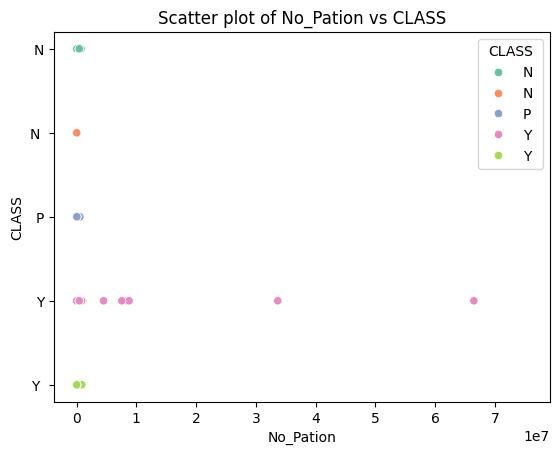

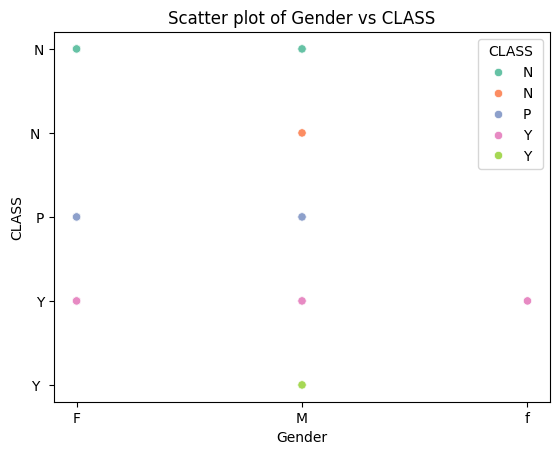

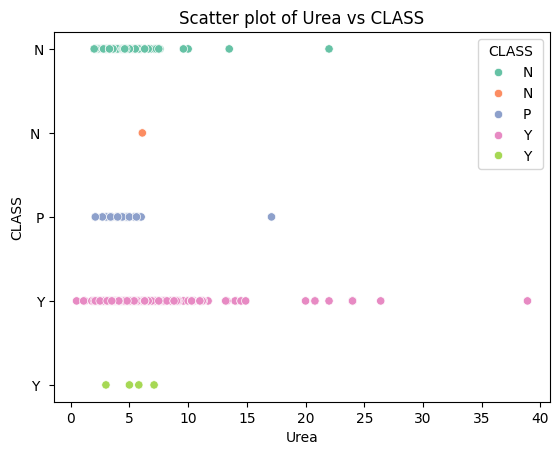

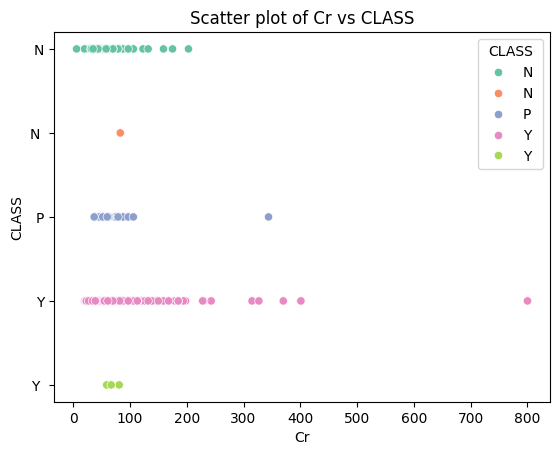

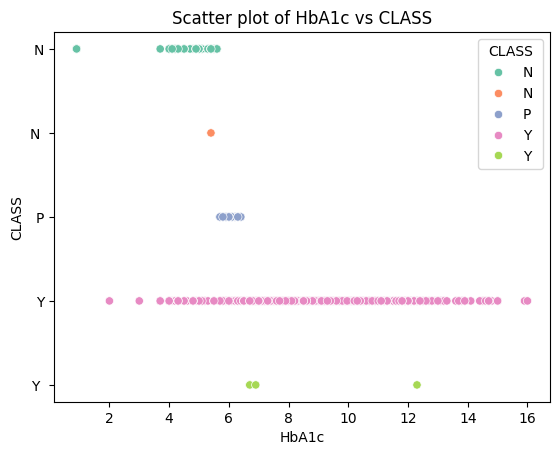

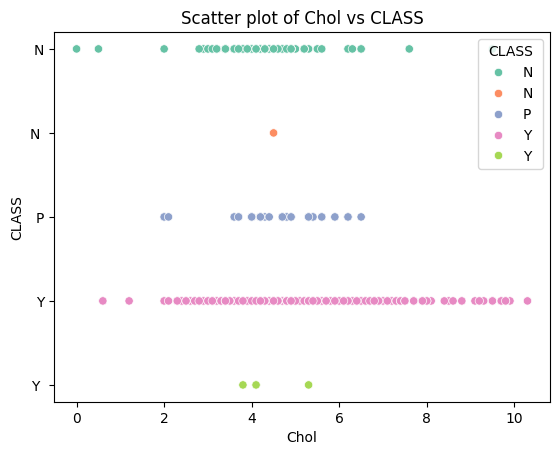

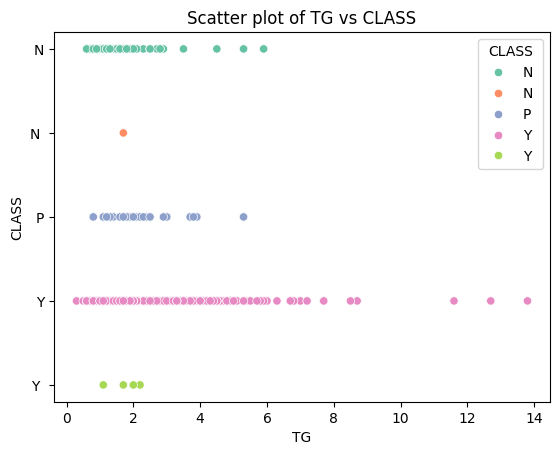

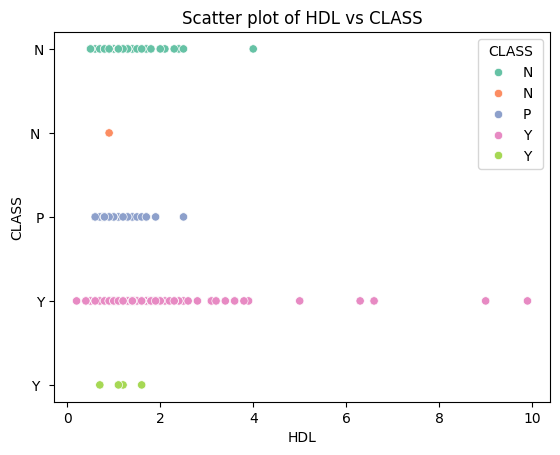

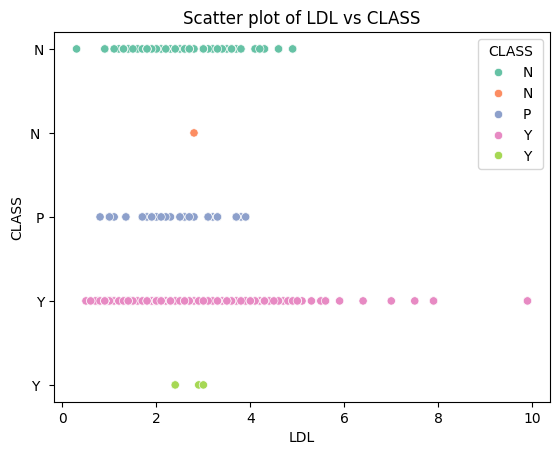

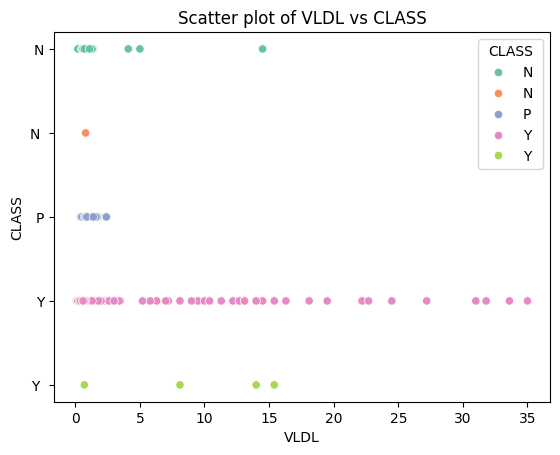

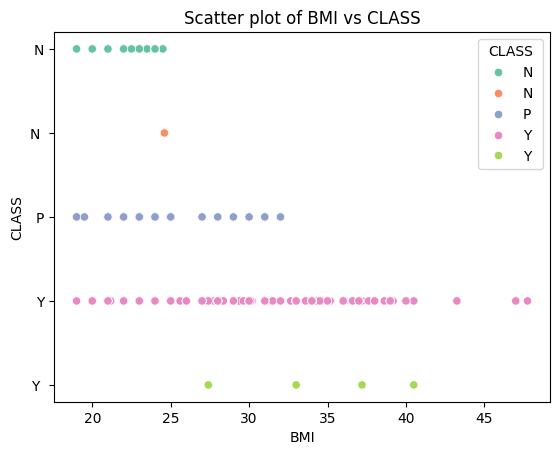

In [ ]:
# Exclude the 'ID','AGE' and 'CLASS' columns
selected_features = df.drop(columns=['ID', 'AGE','CLASS'])

# Create scatter plots for each attribute against the target variable 'Gender'
for column in selected_features.columns:
    sns.scatterplot(data=df, x=column, y='CLASS', hue='CLASS', palette='Set2')
    plt.title(f"Scatter plot of {column} vs CLASS")
    plt.xlabel(column)
    plt.ylabel('CLASS')
    plt.legend(title='CLASS', loc='upper right')
    plt.show()

The majority of our data consists of numeric features, and one of the best ways to analyze it is through scatter plots to visualize the relationship between each feature and the target variable (CLASS). Here, we display the relationships by plotting each feature against CLASS, with points color-coded by class categories. This approach provides insights into how features differ between classes and highlights patterns or separations that may assist in distinguishing the classes effectively.



array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'No_Pation'}>,
        <Axes: title={'center': 'AGE'}>],
       [<Axes: title={'center': 'Urea'}>, <Axes: title={'center': 'Cr'}>,
        <Axes: title={'center': 'HbA1c'}>],
       [<Axes: title={'center': 'Chol'}>, <Axes: title={'center': 'TG'}>,
        <Axes: title={'center': 'HDL'}>],
       [<Axes: title={'center': 'LDL'}>,
        <Axes: title={'center': 'VLDL'}>,
        <Axes: title={'center': 'BMI'}>]], dtype=object)

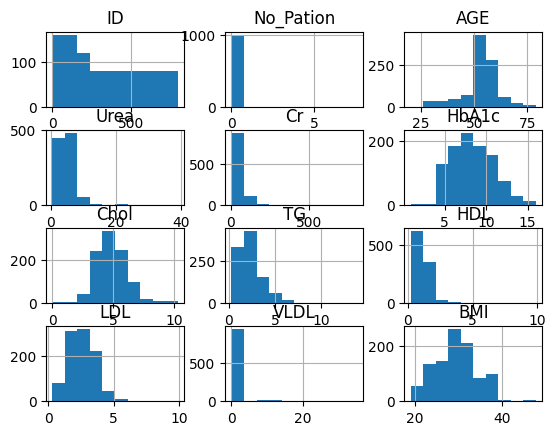

In [ ]:
df.hist()

We selected histograms to visualize our data because they effectively represent the distribution of our predominantly numerical dataset

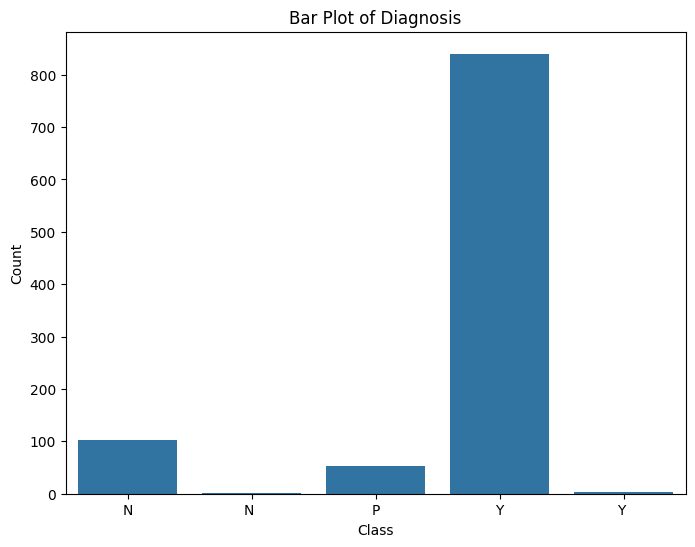

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot for the 'CLASS' column
plt.figure(figsize=(8, 6))  # Set the figure size
sns.countplot(x='CLASS', data=df)  # Corrected the 'data' parameter
plt.title("Bar Plot of Diagnosis")  # Set the plot title
plt.xlabel("Class")  # Label for the x-axis
plt.ylabel("Count")  # Label for the y-axis
plt.show()  # Display the plot


The bar plot illustrates the distribution of individuals across the different classes in the CLASS column, representing diabetes categories. Specifically, the count of individuals classified as "Y" (Diabetic) is approximately 800, while those classified as "N" (Non-Diabetic) are around 100, and individuals in the "P" (Predict-Diabetic) category are approximately 50. Additionally, duplicate values for "N" and "Y" appear due to spacing or typing errors by the user, indicating that the data is not fully clean yet. This emphasizes the importance of data preprocessing to remove duplicates and ensure data quality before proceeding with analysis or classification tasks.

## 4.Data preprocessing

* Missing data

Presenting an efficient way to inspect a DataFrame for missing values and identify which columns contain missing data, along with the number of missing values in each column, as shown below. In this example, our dataset does not contain any missing values.

In [ ]:
missing_values= df.isna().sum() #calculates the number of missing values for each column in the DataFrame
print("The missing data in each column:")
print(missing_values)

The missing data in each column:
ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


* Duplicated data

To maintain data integrity and accuracy, it is important to check for and remove duplicate rows in a DataFrame. This process involves scanning for identical rows and removing them if found, ensuring a clean dataset for analysis. If no duplicates are detected, the code confirms this. In this case, the code indicates that our data does not have any duplicated values, as shown below.

In [ ]:
# Check for duplicated rows
duplicated_rows = df[df.duplicated()]

if not duplicated_rows.empty:
    print("There is Duplicated rows data found! Removing duplicates")

else:
    print("There is No duplicated rows data found.")

There is No duplicated rows data found.


* Clean and Standardize data

To ensure accurate data analysis, it is important to remove any extra spaces in string values and capitalize characters in categorical columns like 'Gender' entered by users, as they can cause inconsistencies, such as misidentifying duplicates or grouping errors. Cleaning these spaces and capitalizing categorical values enhances the clarity and accuracy of the analysis; therefore, we implemented the code below to efficiently remove spaces from the string values and convert all letters in the 'Gender' column to uppercase.

In [ ]:
# Remove spaces in the specific column and capitalize the letters in 'Gender'
df['CLASS'] = df['CLASS'].str.replace(' ', '', regex=False)
df['Gender'] = df['Gender'].str.replace(' ', '', regex=False).str.upper()

print("The Clean and Standardize data:")
print(df)

The Clean and Standardize data:
      ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0    502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1    735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2    420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3    680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4    504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   
..   ...        ...    ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   
995  200     454317      M   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6   
996  671     876534      M   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4   
997  669      87654      M   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1   
998   99      24004      M   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0   
999  248      24054      M   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      BMI CLASS  
0

* Detecting and Removing outliers

Determine and remove outliers from numeric columns of a DataFrame using the Interquartile Range (IQR) to enhance data quality and consistency during the preprocessing and cleaning stages

In [ ]:
# Detect and remove outliers
outlier_threshold = 1.5

def identify_outliers(column_df):
    q1 = np.percentile(column_df, 25)
    q3 = np.percentile(column_df, 75)
    iqr = q3 - q1
    return (column_df < q1 - outlier_threshold * iqr) | (column_df > q3 + outlier_threshold * iqr)

numeric_columns = ['Urea', 'Cr', 'BMI', 'HbA1c', 'TG', 'HDL', 'LDL', 'VLDL', 'Chol']

def remove_outliers(df):
    total_outliers_removed = 0  # Variable to keep track of total outliers removed
    # Loop to check and remove all outliers
    for _ in range(10):
        outlier_selection = np.any([identify_outliers(df[col]) for col in numeric_columns], axis=0)
        if not outlier_selection.any():
            break
        total_outliers_removed += outlier_selection.sum()
        df = df[~outlier_selection].copy()
    return df, total_outliers_removed  # Return the cleaned DataFrame and the total outliers removed

print(f"Original rows: {len(df)}")
df, total_outliers_removed = remove_outliers(df)
print(f"Removing {total_outliers_removed} outliers")
print(f"Rows after removing outliers: {len(df)}")

Original rows: 1000
Removing 292 outliers
Rows after removing outliers: 708


* Encoding

We encoded the 'Gender' column to convert categorical data into numerical format, with 'M' as 1 and 'F' as 0, allowing for easier analysis. This ensures that classification tasks can be performed accurately and efficiently.


In [ ]:
#Encoding


le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender']) # M = 1 , F = 0

print("Encoding categorical data:")
print(df)

Encoding categorical data:
      ID  No_Pation  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
1    735      34221       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
4    504      34223       1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   
5    634      34224       0   45   2.3  24    4.0   2.9  1.0  1.0  1.5   0.4   
6    721      34225       0   50   2.0  50    4.0   3.6  1.3  0.9  2.1   0.6   
7    421      34227       1   48   4.7  47    4.0   2.9  0.8  0.9  1.6   0.4   
..   ...        ...     ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   
990  194     454316       0   57   4.1  70    9.3   5.3  3.3  1.0  1.4   1.3   
991  195       4543       0   55   4.1  34   13.9   5.4  1.6  1.6  3.1   0.7   
992  196     454316       1   55   3.1  39    8.5   5.0  2.5  1.9  2.9   0.7   
993  198     454316       1   28   3.5  61    8.5   4.5  1.9  1.1  2.6   0.8   
999  248      24054       1   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      BMI CL

 * Balancing data

balancing data for building robust and unbiased machine learning models that perform well across all classes and accurately reflect the underlying distribution of data in real-world scenarios.

 The code check the data balancing of the lable class (CLASS) by calculates and displays the percentage frequency of each unique class (Y, N and P)in the CLASS column of the dataset.




In [ ]:
#calculate the frequancy for each type in  the class label
class_frequency = df['CLASS'].value_counts(normalize=True)*100

print("The percentage of each type in the class lable\n" +class_frequency.to_string())

The percentage of each type in the class lable
CLASS
Y    82.485876
N    10.593220
P     6.920904


From the results, we observe that the class percentages are not closely equal, indicating an imbalanced dataset. To address this, we applied data balancing techniques to ensure that the dataset has a more even class distribution.

In [ ]:
# Check initial class distribution
print("Original class distribution:\n", df['CLASS'].value_counts())

# Set desired total sample size and calculate required samples for each class
total_sample_size = 709  # Desired sample size
CLASS_N_sample_size = int(total_sample_size * 0.3)  # 30% for CLASS = N
CLASS_P_sample_size = int(total_sample_size * 0.3)  # 30% for CLASS = P
CLASS_Y_sample_size = total_sample_size - CLASS_N_sample_size - CLASS_P_sample_size  # Remaining 40% for CLASS = Y

# Adjust sample sizes based on the available data
if df[df['CLASS'] == 'N'].shape[0] < CLASS_N_sample_size:
    CLASS_N_sample_size = df[df['CLASS'] == 'N'].shape[0]
if df[df['CLASS'] == 'P'].shape[0] < CLASS_P_sample_size:
    CLASS_P_sample_size = df[df['CLASS'] == 'P'].shape[0]
if df[df['CLASS'] == 'Y'].shape[0] < CLASS_Y_sample_size:
    CLASS_Y_sample_size = df[df['CLASS'] == 'Y'].shape[0]

# Sample from each class
balanced_sample = pd.concat([
    df[df['CLASS'] == 'N'].sample(CLASS_N_sample_size, replace=True, random_state=42),
    df[df['CLASS'] == 'P'].sample(CLASS_P_sample_size, replace=True, random_state=42),
    df[df['CLASS'] == 'Y'].sample(CLASS_Y_sample_size, replace=True, random_state=42),
])

# Verify the balanced sample distribution
print("Balanced sample class distribution:\n", balanced_sample['CLASS'].value_counts())

df = balanced_sample

print(balanced_sample)

Original class distribution:
 CLASS
Y    584
N     75
P     49
Name: count, dtype: int64
Balanced sample class distribution:
 CLASS
Y    285
N     75
P     49
Name: count, dtype: int64
      ID  No_Pation  Gender  AGE  Urea   Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
66    42       1168       0   35   2.8   50    5.0   4.7  2.5  1.3  2.4   1.1   
19   742      34239       0   49   3.8   55    4.0   4.4  0.9  1.0  1.3   0.4   
96   180     454316       0   54   6.3  106    5.6   4.3  2.0  1.3  2.2   0.9   
78   134      45367       0   30   3.6   61    5.4   6.5  1.8  1.5  4.2   0.8   
26   494      45566       1   30   4.8   80    5.5   5.5  1.8  1.2  3.5   0.8   
..   ...        ...     ...  ...   ...  ...    ...   ...  ...  ...  ...   ...   
651  570       5325       1   51   6.1   56    8.0   4.9  2.1  1.1  2.5   0.9   
873   33      35645       0   55   1.8   24    6.7   4.8  0.6  1.9  2.6   1.1   
576  403       7363       0   56   7.7   68    9.8   6.1  3.2  0.7  4.1   1.4   
416  

*	Normalization

Normalization is crucial for our diabetes dataset because it ensures all features are on a similar scale, allowing machine learning models to learn more effectively. By scaling the data to a consistent range, such as between 0 and 1, normalization reduces the influence of larger numerical values and accelerates model convergence. This uniformity not only improves model performance but also makes it easier to interpret the relative importance of each feature. Ultimately, normalization enhances model accuracy and helps us better predict diabetes outcomes.


In [ ]:

#select only numirical column
columns_to_normalize = ['Urea', 'Cr', 'BMI', 'HbA1c','TG','HDL','LDL','VLDL','Chol']

# Select the data to normalize
data_to_normalize = df[columns_to_normalize]

# Z-score normalization for selected columns
zscore_scaler = StandardScaler()
normalized_data_zscore = zscore_scaler.fit_transform(data_to_normalize)

# Replace the normalized values in the original dataframe
df[columns_to_normalize] = normalized_data_zscore

print("The z-score normalized data:")
print(df)

The z-score normalized data:
      ID  No_Pation  Gender  AGE      Urea        Cr     HbA1c      Chol  \
66    42       1168       0   35 -1.223518 -0.560156 -1.037946 -0.007440   
19   742      34239       0   49 -0.491162 -0.284725 -1.430649 -0.292721   
96   180     454316       0   54  1.339728  2.524676 -0.802324 -0.387814   
78   134      45367       0   30 -0.637633  0.045793 -0.880865  1.704243   
26   494      45566       1   30  0.241194  1.092432 -0.841594  0.753308   
..   ...        ...     ...  ...       ...       ...       ...       ...   
651  570       5325       1   51  1.193257 -0.229638  0.140163  0.182747   
873   33      35645       0   55 -1.955875 -1.992400 -0.370351  0.087653   
576  403       7363       0   56  2.365027  0.431397  0.847029  1.323869   
416   62      46059       1   55  1.852378 -0.229638  0.572137 -0.958375   
305   91      46374       1   55 -0.564398  1.808554 -0.173999 -1.433842   

           TG       HDL       LDL      VLDL       BMI CLAS

* Aggregation

In aggregation we grouped the data based on the "Gender" column and applied the "mean" function. This will give us the mean values for the ( 'Cr' , 'HbA1c' , 'Chol' , 'TG' , 'HDL' , 'LDL' , 'VLDL' , 'BMI' ) columns for both male and female patients. Aggregation will help us derive insights from the data by summarizing it.

In [ ]:
#Aggregation

avg = df.groupby('Gender')[['Urea', 'Cr', 'BMI', 'HbA1c', 'TG', 'HDL', 'LDL', 'VLDL', 'Chol']].agg('mean')

print("Average data by Gender:")
print(avg)

Average data by Gender:
            Urea        Cr       BMI     HbA1c        TG       HDL       LDL  \
Gender                                                                         
0      -0.268930 -0.470245 -0.107328  0.083786 -0.132032  0.135736 -0.055914   
1       0.199123  0.348182  0.079468 -0.062037  0.097760 -0.100502  0.041400   

            VLDL      Chol  
Gender                      
0       0.018698 -0.012359  
1      -0.013845  0.009151  


* Discretization

Discretization simplifies the process of representing data, making it easier to analyze, interpret, and make decisions. This technique is useful in some machine learning algorithms, as it converts continuous data into discrete categories, aiding in tasks like classification and model training. We used it as shown below to categorize continuous values and enhance our analysis.

Discretization is applied to the "AGE" column to convert it into categorical age groups:

28 – 44 Years = "Young Adults"

45 – 61 Years = "Middle-aged Adults"

62 – 77 Years = "Older Adults"

The ranges were set dependeing on the values we have in our dataset. this transformation helps prepare the data for certain machine learning algorithms that require categorical features or for easier analysis in a more interpretable format.

In [ ]:
# Discretization code

lAge = ['Young Adults', 'Middle-aged Adults', 'Older Adults']

df['AGE']= pd.cut(df['AGE'], bins=3, labels=lAge)

print("The Discretized data:")
print(df)

The Discretized data:
      ID  No_Pation  Gender                 AGE      Urea        Cr     HbA1c  \
66    42       1168       0        Young Adults -1.223518 -0.560156 -1.037946   
19   742      34239       0  Middle-aged Adults -0.491162 -0.284725 -1.430649   
96   180     454316       0  Middle-aged Adults  1.339728  2.524676 -0.802324   
78   134      45367       0        Young Adults -0.637633  0.045793 -0.880865   
26   494      45566       1        Young Adults  0.241194  1.092432 -0.841594   
..   ...        ...     ...                 ...       ...       ...       ...   
651  570       5325       1  Middle-aged Adults  1.193257 -0.229638  0.140163   
873   33      35645       0  Middle-aged Adults -1.955875 -1.992400 -0.370351   
576  403       7363       0  Middle-aged Adults  2.365027  0.431397  0.847029   
416   62      46059       1  Middle-aged Adults  1.852378 -0.229638  0.572137   
305   91      46374       1  Middle-aged Adults -0.564398  1.808554 -0.173999   

     

* Feature selection

We aim to select the best 10 features, excluding the id ,gender and CLASS columns, because research indicates that having around 10 attributes is generally sufficient to accurately predict diabetes outcomes. This selection will help us build a robust model that can effectively identify and classify diabetes risk based on relevant features in the dataset.

In [ ]:
#Feature selection

print("Column names in the dataset:")
print(df.columns)
#converts the categorical variable Class into a numerical format. LabelEncoder transforms the string labels into integers
label_encoder = LabelEncoder()
df['CLASS_encoded'] = label_encoder.fit_transform(df['CLASS'])

#exclude the column that we want to predict and the coded version , catigoral column , unique identifier
X = df.drop(columns=['CLASS', 'CLASS_encoded','Gender','ID','AGE'] )
#the encoded target variable
y = df['CLASS_encoded']

# Calculate the correlation coefficients between numerical features and target variable
correlation_values = np.abs(X.corrwith(y))
#This sorts the correlation values in descending order,
correlation_values.sort_values(ascending=False, inplace=True)
# selects the top k features
k = 10
#selected_feature_names will contain the names of the top 10 features with the strongest correlation to the target variable.
selected_feature_names = correlation_values.head(k).index.tolist()

# Create the DataFrame with selected features including the target variable
df_selected = df[['CLASS','ID'] + selected_feature_names]
#prints the names of the selected features based on their correlation with CLASS
print("Selected Features based on Correlation:")
print(selected_feature_names)


Column names in the dataset:
Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')
Selected Features based on Correlation:
['BMI', 'HbA1c', 'TG', 'VLDL', 'No_Pation', 'Chol', 'Urea', 'Cr', 'HDL', 'LDL']


In [ ]:
#save the modified dataframe to new csv file
df_selected.to_csv('Dataset/Processed_dataset.csv',index=False)

* raw dataset // before preprocessing

In [ ]:
data= pd.read_csv('Dataset/Original_dataset.csv')
print(data.head())

    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  


* processed dataset



In [ ]:
data= pd.read_csv('Dataset/Processed_dataset.csv')
print(data.head())

  CLASS   ID       BMI     HbA1c        TG      VLDL  No_Pation      Chol  \
0     N   42 -1.611603 -1.037946  0.483897  0.285760       1168 -0.007440   
1     N  742 -0.991406 -1.430649 -1.256961 -1.357072      34239 -0.292721   
2     N  180 -1.611603 -0.802324 -0.060121 -0.183621     454316 -0.387814   
3     N  134 -0.784673 -0.880865 -0.277728 -0.418311      45367  1.704243   
4     N  494 -1.818335 -0.841594 -0.277728 -0.418311      45566  0.753308   

       Urea        Cr       HDL       LDL  
0 -1.223518 -0.560156  0.543415 -0.197887  
1 -0.491162 -0.284725 -0.373864 -1.289200  
2  1.339728  2.524676  0.543415 -0.396308  
3 -0.637633  0.045793  1.154935  1.587898  
4  0.241194  1.092432  0.237655  0.893426  


## 5.Data Mining Technique

---



We applied both classification(supervised learning) and clustering(unsupervised learning) techniques .

For classification, we used a decision tree, a recursive algorithm that generates a tree structure with leaf nodes representing final decisions. Our model predicts the class label for diabetes disease (CLASS), which has three categories: Y(Diabetic) , N(Non-Diabetic), and P(Predict-Diabetic), based on other attributes. The dataset was divided into:

Training dataset: Used to construct the decision tree model.
Testing dataset: Used to evaluate the performance of the model.
To assess the model's accuracy, we utilized metrics such as accuracy score and confusion matrices, with visualizations providing additional clarity.

For clustering, we did not use the class label (CLASS) for implementing the clusters because it is an unsupervised learning technique. Therefore, we removed the class label and used the remaining numerical attributes for clustering after preprocessing the data. The features used included HDL, LDL, VLDL, HbA1c, Glucose, and Triglycerides. All these features are numeric, so no additional conversion was required before the clustering process.

By standardizing the data, we ensured all features were on a similar scale, which improved the performance and accuracy of the clustering algorithm.








We implemented the K-Means algorithm to create K clusters, where each cluster is represented by a centroid (center point). The algorithm assigns each data point to the nearest cluster based on distance, recalculates the centroids, and iteratively reassigns points to clusters until the centroids stabilize. This ensures that every data point is grouped into the most appropriate cluster, and the process continues until the clustering results converge and no further changes occur.

To evaluate the clustering quality, we used two methods. First, the Elbow Method was applied to determine the optimal number of clusters by analyzing the within-cluster sum of squares (WCSS) for different values of K. The "elbow point" in the WCSS plot indicates the ideal number of clusters, beyond which adding more clusters does not significantly improve the model. Second, the Silhouette Score was used to measure the consistency and quality of clustering by assessing how well data points fit within their assigned clusters compared to others. These evaluation techniques ensured that our clustering results were meaningful and accurately reflected the structure of the data.








Python packages and methods for classification :


* pandas to read the data
* pd.read_csv
*  DataFrame()
* drop: To remove the class label column.
* train_test_split() from sklearn.model_selection: To divide the dataset into training and testing sets.
* DecisionTreeClassifier() from sklearn.tree
* keys().tolist()
* train_test_split()
* DecisionTreeClassifier()
* Tclf.fit(): To train the model on the training data.
* Tclf.predict(): To make predictions using the trained model.
* accuracy_score() from sklearn.metrics
* confusion_matrix() from sklearn.metrics
* ConfusionMatrixDisplay() from sklearn.metrics
* unique()
* ConfusionMatrixDisplay.from_estimator()
* subplots()
* tree.plot_tree() from sklearn.tree
* matplotlib.pyplot

Python Packages and Methods for Clustering:

* pandas to read the data
* DataFrame()
* numpy
* drop: To remove the class label column
* StandardScaler() from sklearn.preprocessing
* scaler.fit_transform(): To standardize numerical features.
* KMeans() from sklearn.cluster
* random.seed()
* kmeans.fit(): To train the clustering model
* SilhouetteVisualizer from yellowbrick.cluster
* visualizer.fit() and  visualizer.show()
* matplotlib.pyplot
* wcss.append()
* plt.plot() and plt.title()
* plt.xlabel()
* plt.ylabel()




## 6.Evaluation and Comparison

## Classification

Classification is a fundamental task in machine learning and data analysis, with applications across various domains. Its importance lies in its ability to categorize or classify data into predefined classes or categories based on input features.

Firstly we are going to read the data and and import the necessary libraries

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
#load data
df = pd.read_csv('Dataset/Processed_dataset.csv')
print(df.head())

  CLASS   ID       BMI     HbA1c        TG      VLDL      Chol      Urea  \
0     N  255 -1.697288 -1.536477 -0.139193 -0.373982 -0.057557 -0.258711   
1     N  504 -1.697288 -1.296987 -1.157491 -1.321316  0.127251  1.920990   
2     N  237 -1.062665 -1.656221 -0.365482 -0.373982  0.127251 -0.985278   
3     N  139 -1.485747 -1.656221 -0.931203  0.573351 -0.242365  1.339736   
4     N  564 -1.485747 -1.656221  0.992250  0.810184 -1.813235 -0.186055   

        LDL        Cr       HDL  No_Pation  
0 -0.010737 -0.842211  0.913461      34293  
1 -0.619716 -0.725166 -1.002115      34223  
2  0.192255 -0.549599  0.913461      34258  
3  1.511709  1.732777  2.190511      45389  
4  1.207220  2.376525 -1.002115      34309  


The 'ID' and 'No_Pation' columns do not support the model's predictive accuracy, so we will exclude them.

In [ ]:
df.drop(columns = ['ID','No_Pation'], inplace = True)
print(df.head())

  CLASS       BMI     HbA1c        TG      VLDL      Chol      Urea       LDL  \
0     N -1.697288 -1.536477 -0.139193 -0.373982 -0.057557 -0.258711 -0.010737   
1     N -1.697288 -1.296987 -1.157491 -1.321316  0.127251  1.920990 -0.619716   
2     N -1.062665 -1.656221 -0.365482 -0.373982  0.127251 -0.985278  0.192255   
3     N -1.485747 -1.656221 -0.931203  0.573351 -0.242365  1.339736  1.511709   
4     N -1.485747 -1.656221  0.992250  0.810184 -1.813235 -0.186055  1.207220   

         Cr       HDL  
0 -0.842211  0.913461  
1 -0.725166 -1.002115  
2 -0.549599  0.913461  
3  1.732777  2.190511  
4  2.376525 -1.002115  


###Feature selection

We select the columns (features) that we want to use for training the model and store them in the variable 'x', and column containing the classifications (target), which is the class label 'CLASS', is stored in the variable 'y'.

In [ ]:
#split dataset in features and target variable
fn = df.keys().tolist() [1:]
x = df[fn] # Features
y = df['CLASS'] # Target variable
print(x)

          BMI     HbA1c        TG      VLDL      Chol      Urea       LDL  \
0   -1.697288 -1.536477 -0.139193 -0.373982 -0.057557 -0.258711 -0.010737   
1   -1.697288 -1.296987 -1.157491 -1.321316  0.127251  1.920990 -0.619716   
2   -1.062665 -1.656221 -0.365482 -0.373982  0.127251 -0.985278  0.192255   
3   -1.485747 -1.656221 -0.931203  0.573351 -0.242365  1.339736  1.511709   
4   -1.485747 -1.656221  0.992250  0.810184 -1.813235 -0.186055  1.207220   
..        ...       ...       ...       ...       ...       ...       ...   
404 -1.274206 -1.656221  1.331683  1.283850  1.328505 -0.912622  1.308716   
405 -0.216501 -0.498688 -1.383780 -1.321316 -1.074002  0.685826 -1.127198   
406 -0.216501 -0.059624  0.087096 -0.137149  0.127251  1.194423 -0.112234   
407  0.418122  0.459270  0.765961  0.573351  0.496868  0.903796  0.598241   
408  0.206581 -0.059624 -0.139193 -0.373982 -2.090448  1.775677  0.496745   

           Cr       HDL  
0   -0.842211  0.913461  
1   -0.725166 -1.002115

We will use two attribute selection measures: Gini index, IG(entropy).

for each measure we will use 3 different partition sizing to find which is better depending on their accuracy

in each partition the dataset is split into two independent set: training set and testing set. the training set in used for the model construction and the testing set is used for the accuracy estimation.

The dataset was partitioned using the Holdout Method. In this approach, the dataset is separated into different training and testing sets to assess the performance of the model on new data. We selected the three partitions: 70% for training and 30% for testing, 80% for training and 20% for testing, and 90% for training and 10% for testing dependent on the size of the dataset which is 410 tuples. This range provide a good balance between the data used to train reliable models and the data used to test how well they perform.By using different configurations, we can assess how the size of the training set influences classification accuracy, allowing us to select the most appropriate model for our analysis.

###Gini index

 Gini index focuses on selecting the attributes based on minimizing impurity, promoting simpler and computationally efficient splits.

####Data spliting: %90 Training, %10 test

x_train: Feature set for training, comprising 90% of the dataset.

x_test: Feature set for testing, comprising 10% of the dataset.

y_train: Target set for training, corresponding to 90% of the dataset.

y_test: Target set for testing, corresponding to 10% of the dataset.

The random_state is set to a fixed value  to obtain the same split every time the code is run.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

#####Build the decision tree model

In [ ]:
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

# Predict on the test data
y_pred = clf.predict(x_test)

#####Accuracy

 The accuracy is calculated by comparing the results of the predicted labels (y_pred) to the actual labels (y_test).

In [ ]:
# Print the accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9512195121951219


#####Confusion matrix

The confusion matrix is a visual representation of the classifier preformance. Higher values along the diagonal of the matrix indicate better classification accuracy, as they represent correctly predicted instances for each class.

[[ 8  0  0]
 [ 0  4  0]
 [ 2  0 27]]


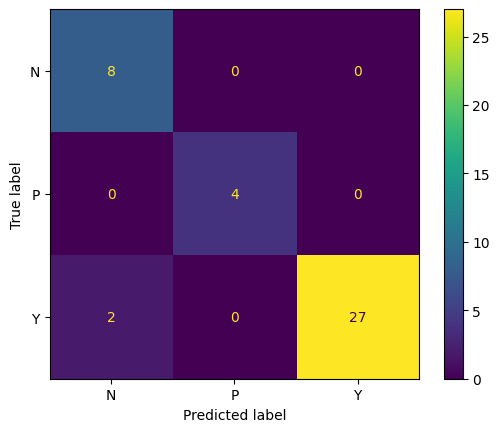

In [ ]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
print(cm)

cn=df['CLASS'].unique()

disp=ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test, display_labels=cn)

True Positives (TP) means the instances that were identified correctly by the model as belonging to the predicted class:

- For N (NN): 8.

- For P (PP): 4.

- For Y (YY): 27.

True Negatives (TN) means the instances that were correctly identified by the model as not belonging to the predicted class:

- For N (PP + YY): 31.

- For P (NN + YY): 35.

- For Y (NN + PP): 12.

False Positives (FP) means the instances that were incorrectly identified by the model as belonging to the predicted class:

- For N (PN + YN): 2.

- For P (NP + YP): 0.

- For Y (NY + PY): 0.

False Negatives (FN) means the instances that were incorrectly identified by the model as not belonging to the predicted class:

- For N (NP + NY): 0.

- For P (PN + PY): 0.

- For Y (YN + YP): 0.

#####Building decision tree model

The decision tree starts with HbA1c as the primary splitting feature. The left branch of the tree evaluates further splits using Chol (Cholesterol) and VLDL (Very Low-Density Lipoprotein), while the right branch focuses on BMI (Body Mass Index), LDL (Low-Density Lipoprotein), and Cr (Creatinine Ratio). Each split reduces Gini impurity, refining the classification until reaching the leaf nodes.

The last step is visualizing the decision tree. The resulting plot illustrates the structure of the decision tree, with node colors representing the class distributions at each split.

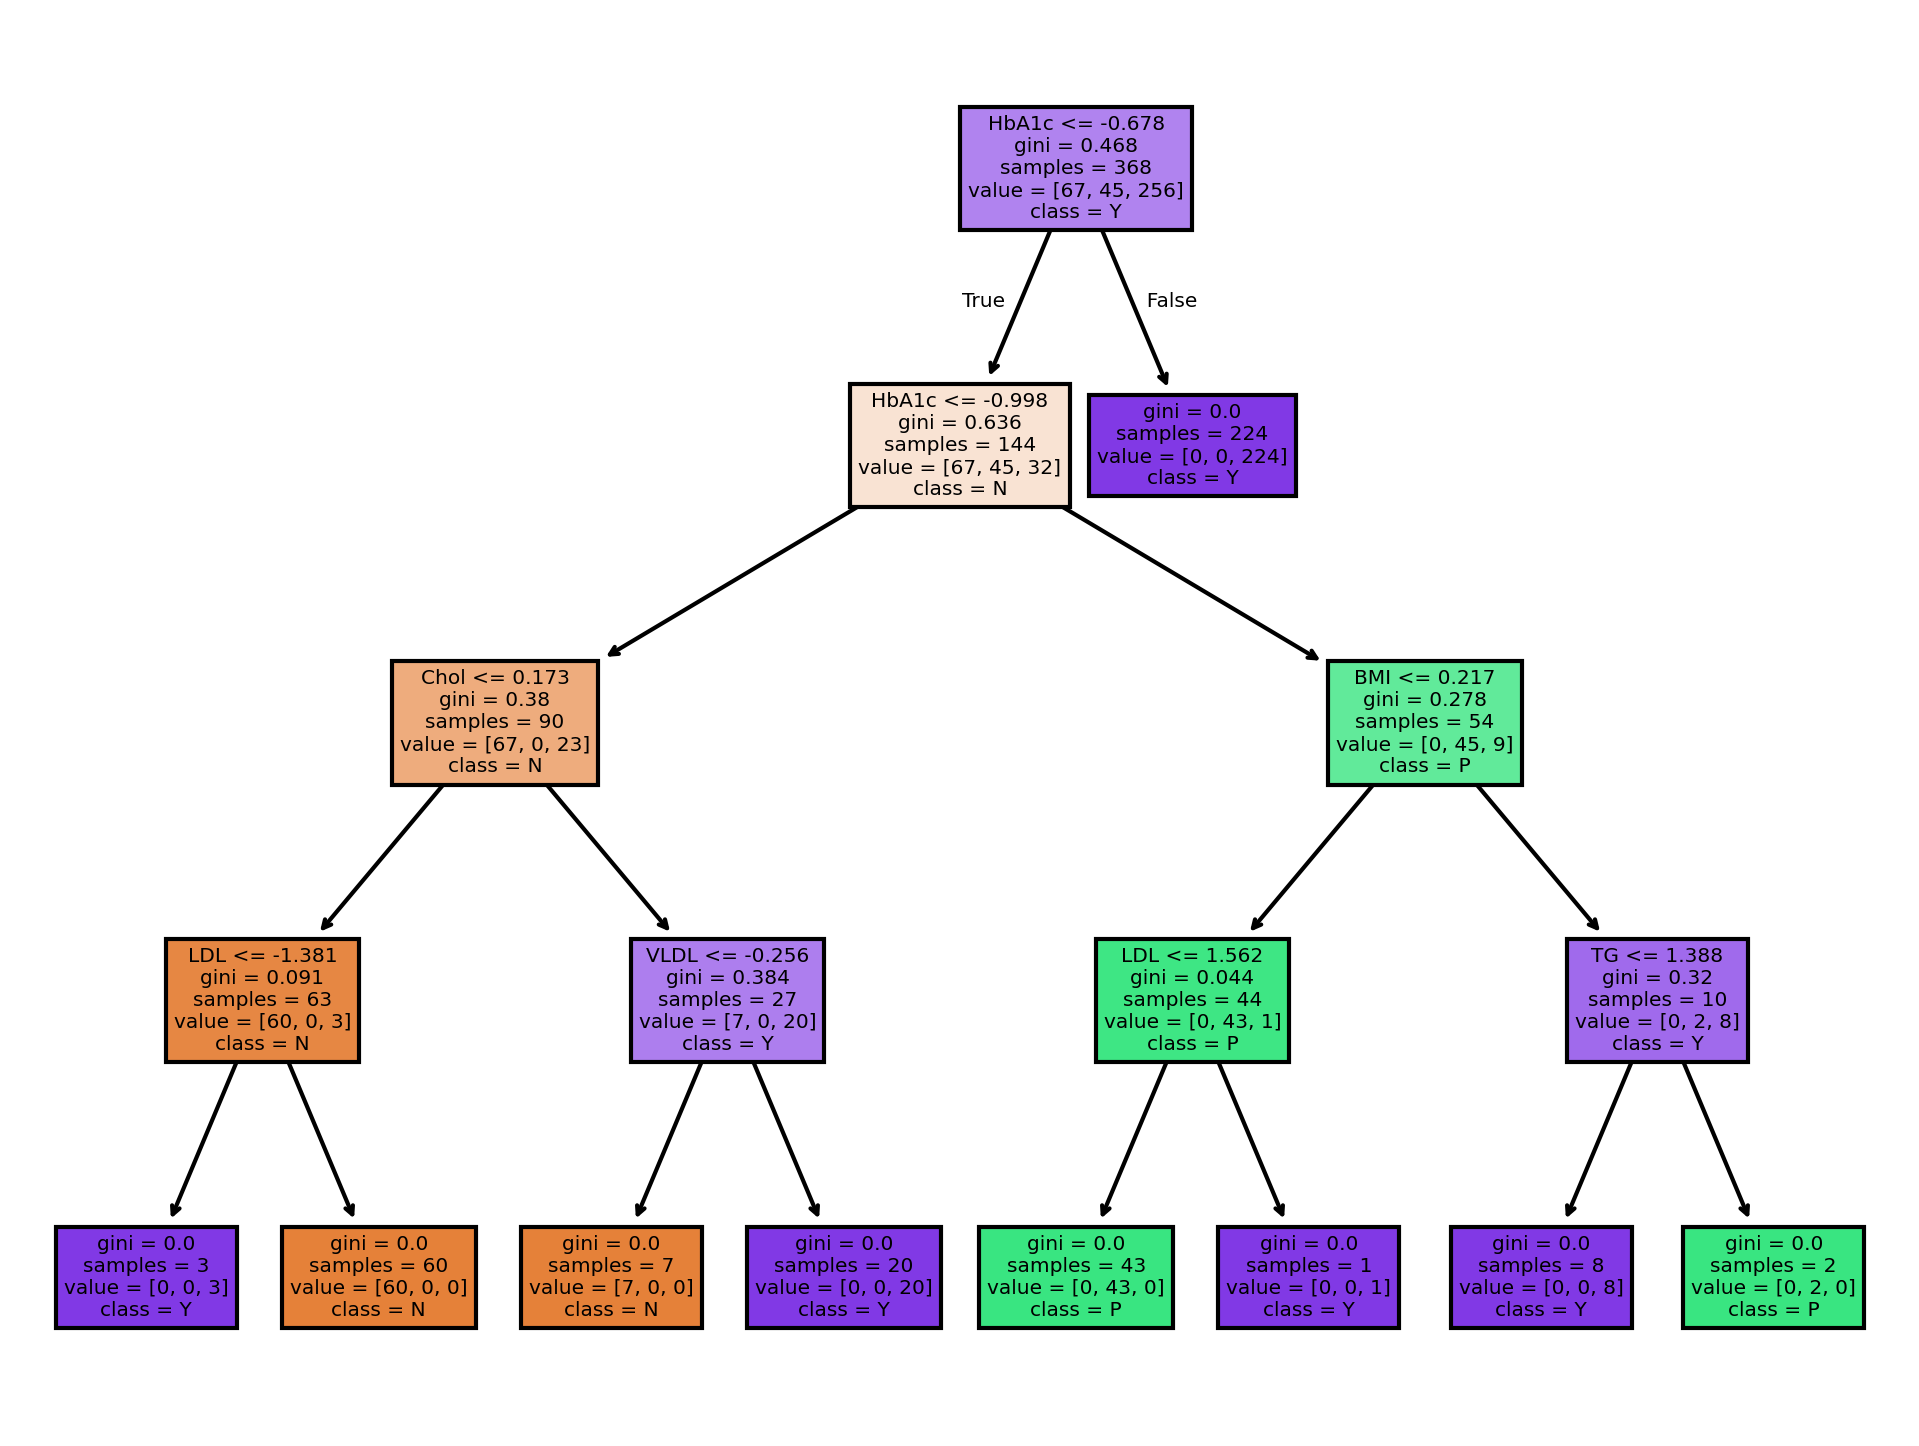

In [ ]:
from sklearn import tree

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,6),dpi=300)

tree.plot_tree(clf,feature_names=fn,class_names=cn,filled=True);

# Save the figure
fig.savefig('decision_tree_visualization1.png')
plt.show()

####Data spliting: %80 Training, %20 test

x_train: Feature set for training, comprising 80% of the dataset.

x_test: Feature set for testing, comprising 20% of the dataset.

y_train: Target set for training, corresponding to 80% of the dataset.

y_test: Target set for testing, corresponding to 20% of the dataset.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

#####Build the decision tree model

In [ ]:
clf= DecisionTreeClassifier() #Gini is the selection measure by The default
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

#####Accuracy

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9512195121951219


#####Confusion matrix

[[11  0  0]
 [ 0 11  2]
 [ 2  0 56]]


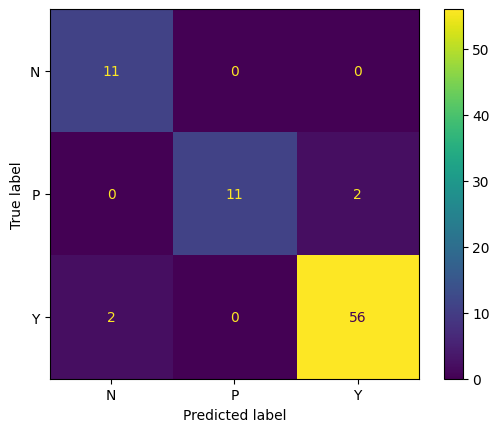

In [ ]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
print(cm)

cn=df['CLASS'].unique()

disp=ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test, display_labels=cn)

True Positives (TP) means the instances that were identified correctly by the model as belonging to the predicted class:

- For N (NN): 11.

- For P (PP): 11.

- For Y (YY): 56.

True Negatives (TN) means the instances that were correctly identified by the model as not belonging to the predicted class:

- For N (PP + YY): 67.

- For P (NN + YY): 67.

- For Y (NN + PP): 22.

False Positives (FP) means the instances that were incorrectly identified by the model as belonging to the predicted class:

- For N (PN + YN): 2.

- For P (NP + YP): 0.

- For Y (NY + PY): 2.

False Negatives (FN) means the instances that were incorrectly identified by the model as not belonging to the predicted class:

- For N (NP + NY): 2.

- For P (PN + PY): 2.

- For Y (YN + YP): 2.

#####Building decision tree model

This tree starts with HbA1c as the root feature, splitting samples based on its values. Subsequent splits use Chol (Cholesterol), LDL (Low-Density Lipoprotein), VLDL (Very Low-Density Lipoprotein), BMI (Body Mass Index), Cr (Creatinine Ratio), and Urea to refine classifications.

The process ends at leaf nodes, providing final classifications as Non-Diabetic (N), Diabetic (Y), or Predict-Diabetic (P) based on the majority class in each node.

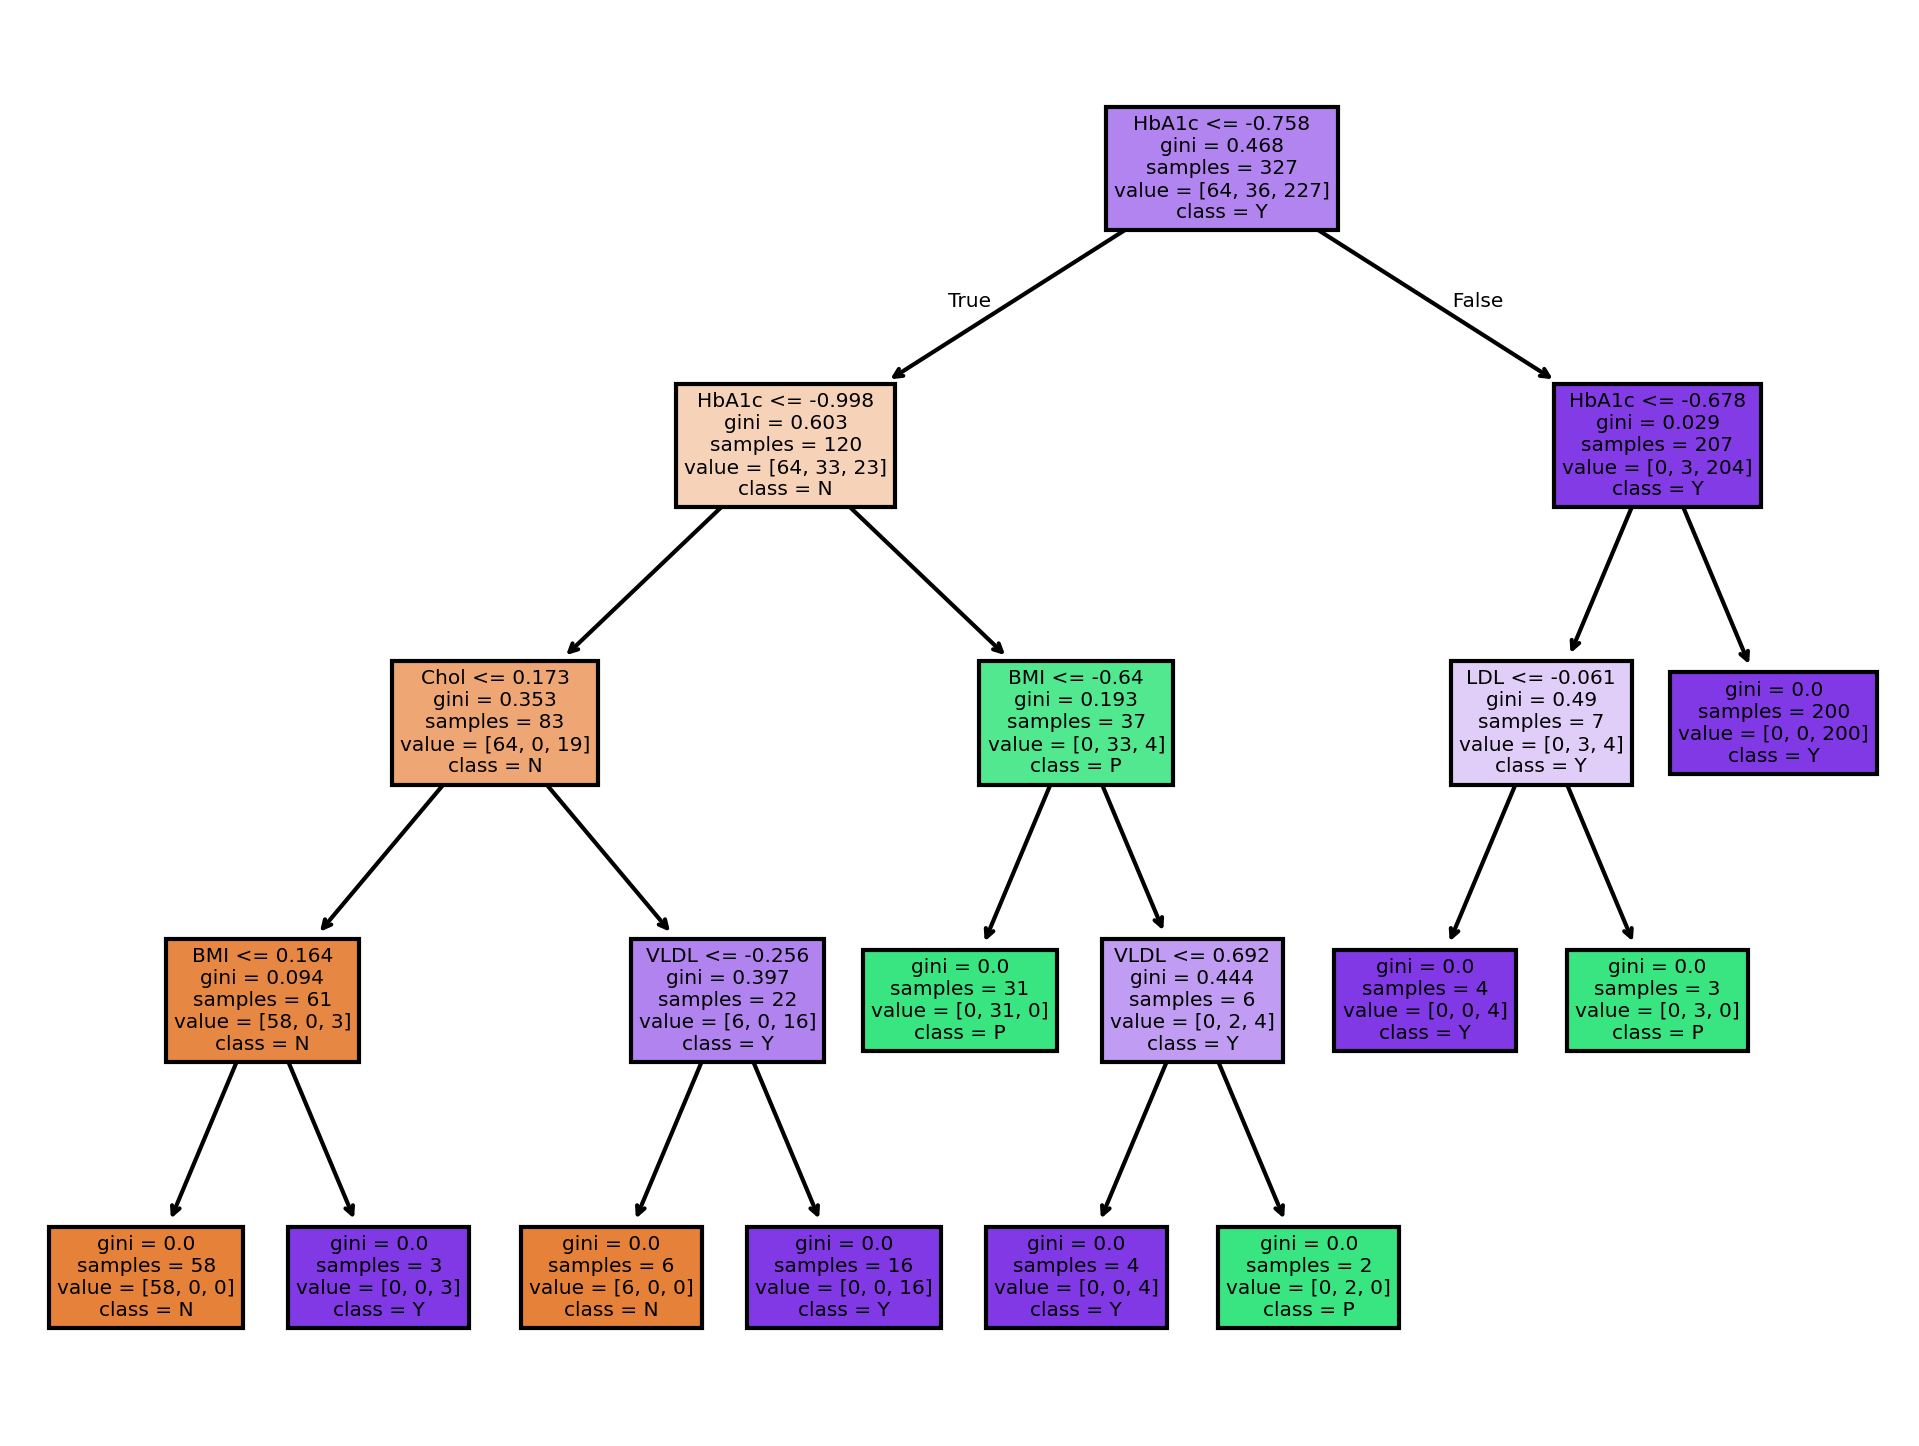

In [ ]:
from sklearn import tree

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,6),dpi=300)

tree.plot_tree(clf,feature_names=fn,class_names=cn,filled=True);

# Save the figure
fig.savefig('decision_tree_visualization2.png')
plt.show()

####Data spliting: %70 Training, %30 test

x_train: Feature set for training, comprising 70% of the dataset.

x_test: Feature set for testing, comprising 30% of the dataset.

y_train: Target set for training, corresponding to 70% of the dataset.

y_test: Target set for testing, corresponding to 30% of the dataset.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

#####Building decision tree model

In [ ]:
clf= DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

#####Accuracy

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.975609756097561


#####Confusion matrix

[[18  0  0]
 [ 0 17  0]
 [ 2  1 85]]


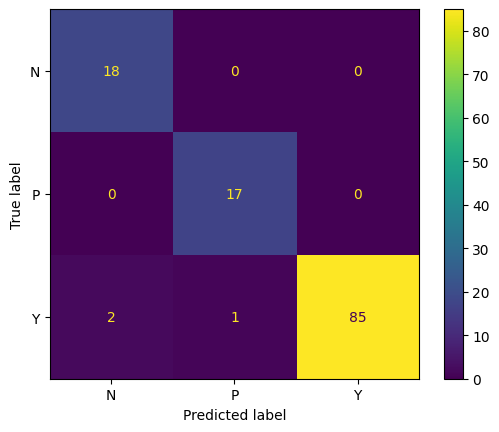

In [ ]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
print(cm)

cn=df['CLASS'].unique()

disp=ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test, display_labels=cn)

True Positives (TP) means the instances that were identified correctly by the model as belonging to the predicted class:

- For N (NN): 18.

- For P (PP): 16.

- For Y (YY): 85.

True Negatives (TN) means the instances that were correctly identified by the model as not belonging to the predicted class:

- For N (PP + YY): 101.

- For P (NN + YY): 103.

- For Y (NN + PP): 34.

False Positives (FP) means the instances that were incorrectly identified by the model as belonging to the predicted class:

- For N (PN + YN): 2.

- For P (NP + YP): 0.

- For Y (NY + PY): 1

False Negatives (FN) means the instances that were incorrectly identified by the model as not belonging to the predicted class:

- For N (NP + NY): 0.

- For P (PN + PY): 1.

- For Y (YN + YP): 2.

#####Building decision tree model

In this tree, the splitting process begins with HbA1c, dividing samples into branches based on its values. The next splits utilize features like Chol (Cholesterol), LDL (Low-Density Lipoprotein), VLDL (Very Low-Density Lipoprotein), BMI (Body Mass Index), and Cr (Creatinine Ratio) to refine classifications.

At each level, the tree reduces Gini impurity to improve predictions. The final splits lead to leaf nodes, which classify samples as Non-Diabetic (N), Diabetic (Y), or Predict-Diabetic (P) based on the majority class in each node. This structure ensures detailed and accurate classifications.

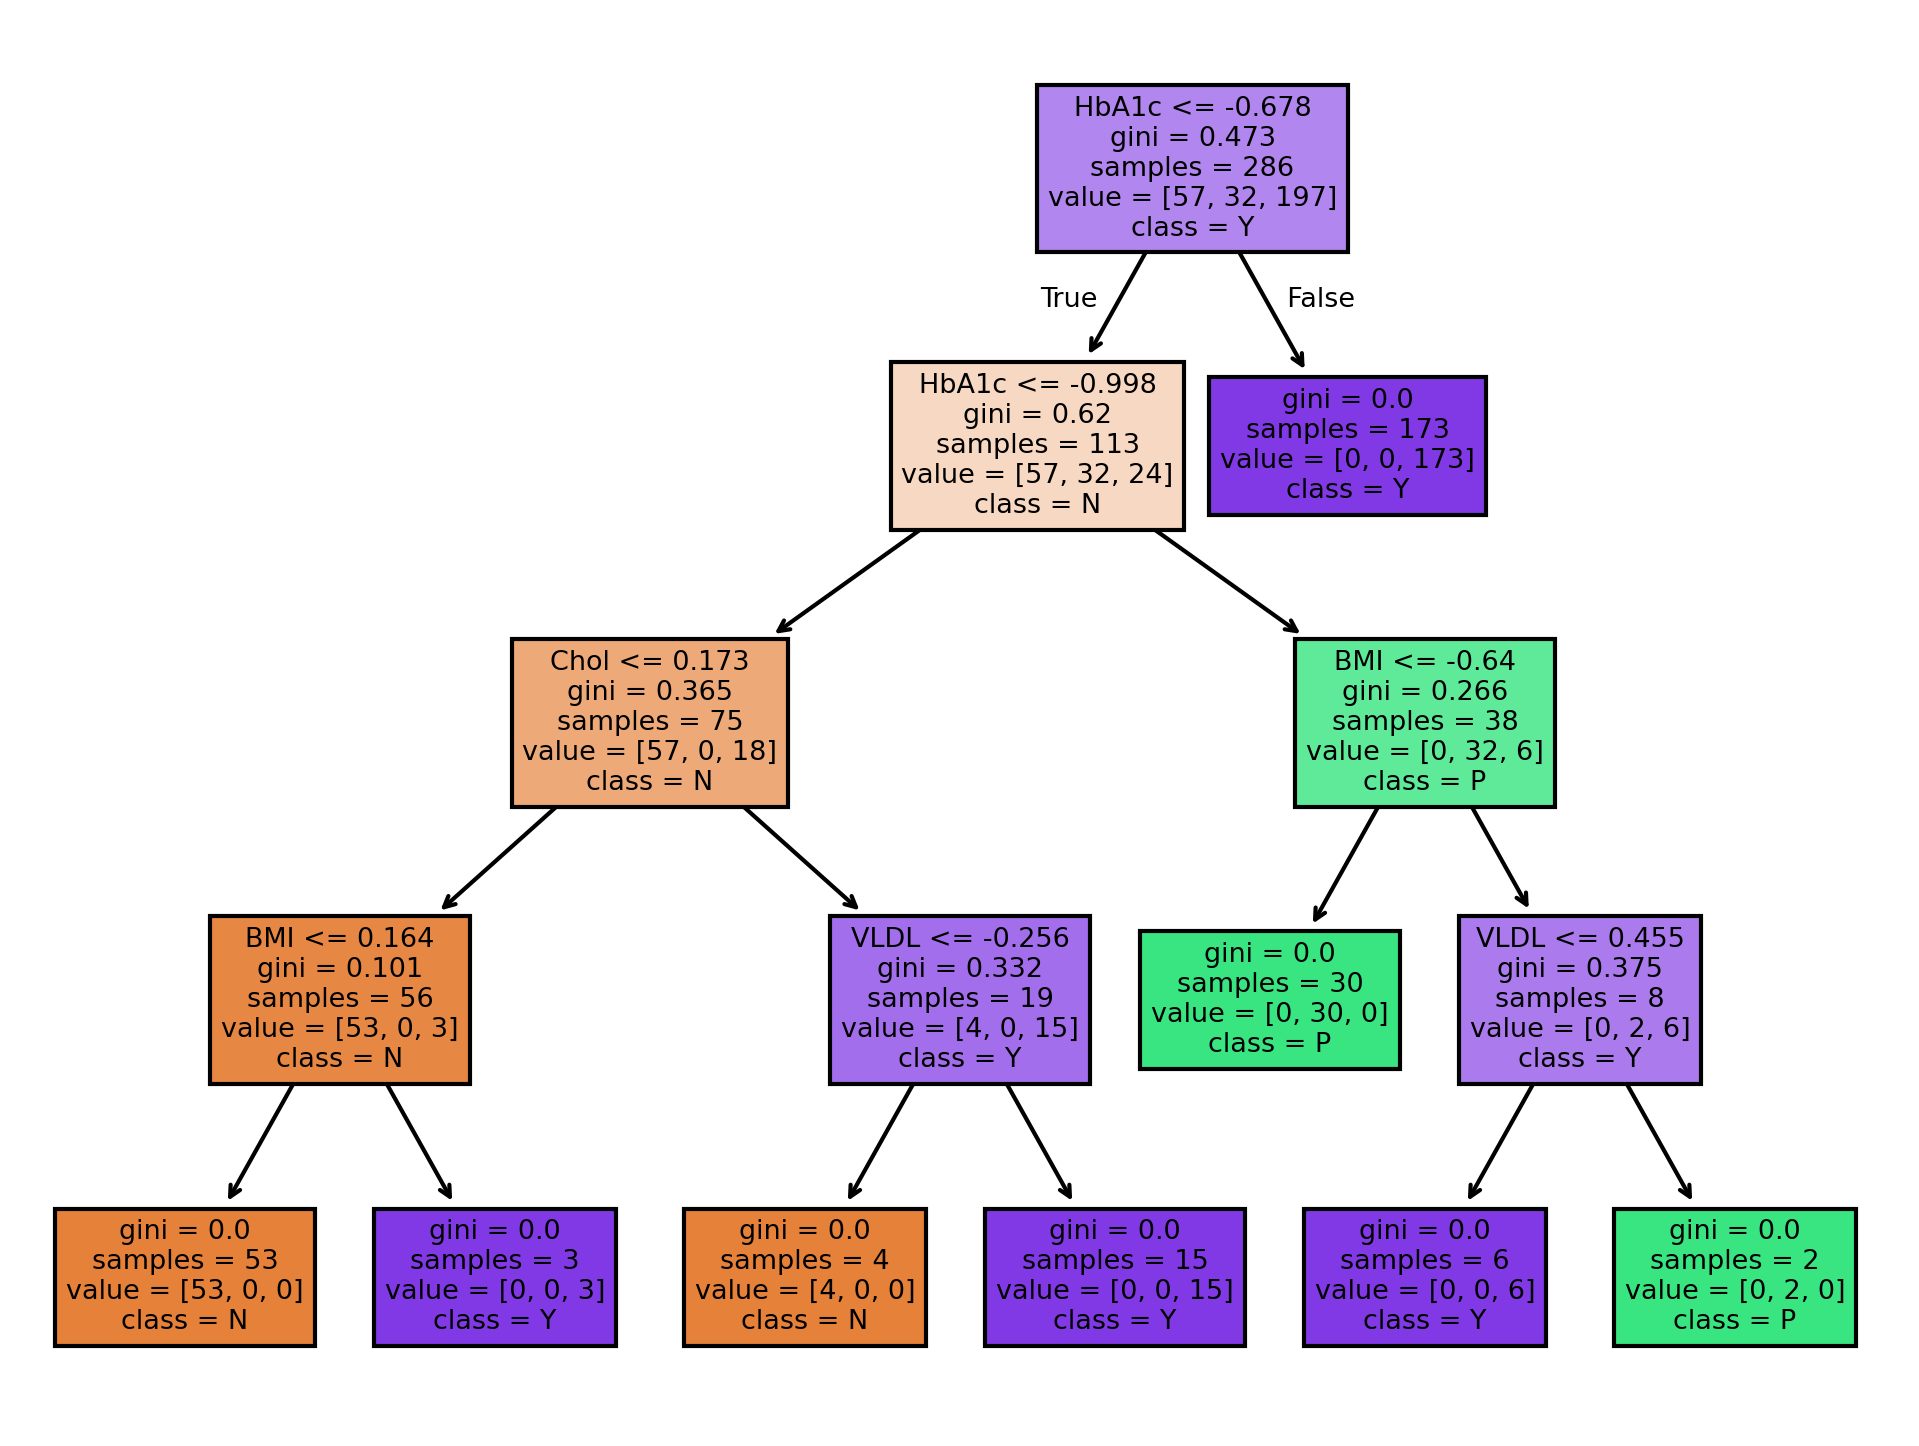

In [ ]:
from sklearn import tree

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,6),dpi=300)

tree.plot_tree(clf,feature_names=fn,class_names=cn,filled=True);

# Save the figure
fig.savefig('decision_tree_visualization3.png')
plt.show()

####Evaluate the models of Gini index

In [ ]:
from IPython.display import display, HTML

# Data for the table
data = {
    "": ["Accuracy"],
    "70% Training, 30% Testing": [0.975609756097561],
    "80% Training, 20% Testing": [0.9512195121951219],
    "90% Training, 10% Testing": [0.9512195121951219],
}

# Create a DataFrame
d = pd.DataFrame(data)

# Generate HTML code for the table
html_table = d.to_html(index=False)

# Display the HTML table
display(HTML(html_table))

,"70% Training, 30% Testing","80% Training, 20% Testing","90% Training, 10% Testing"
Accuracy,0.97561,0.95122,0.95122


Among these partitioning strategies, the model trained on the 70% training set and 30% testing achieved the highest accuracy (0.975 or 97.5%), followed by the two models trained on the 80% training set and 20% testing set and trained on the 90% training set and 10% testing set with an accuracy of (0.951 or 95.1%).

A larger test size reduces the training data, potentially lowering model performance. Conversely, a smaller test size might lead to overfitting, where the model performs well on the test set but poorly on new data. Balancing the training and test sets is crucial for ensuring good generalization. In this case, a 30% test size offers the best balance, resulting in the highest accuracy.

It's important to note that accuracy could be misleading if the dataset were unbalanced, but since the data has already been balanced, the accuracy reflects the model's true performance across all classes.

###IG (entropy)

  IG(entropy) select the attributes that reduce uncertainty the most leading to the most homogeneous branches.

####Data spliting: %90 Training, %10 test

x_train: Feature set for training, comprising 90% of the dataset.

x_test: Feature set for testing, comprising 10% of the dataset.

y_train: Target set for training, corresponding to 90% of the dataset.

y_test: Target set for testing, corresponding to 10% of the dataset.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)

#####Building decision tree model

In [ ]:
clf= DecisionTreeClassifier(criterion="entropy") #changing the selection measure to IG (entropy)
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

#####Accuracy

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9512195121951219


#####Confusion matrix

[[ 8  0  0]
 [ 0  4  0]
 [ 2  0 27]]


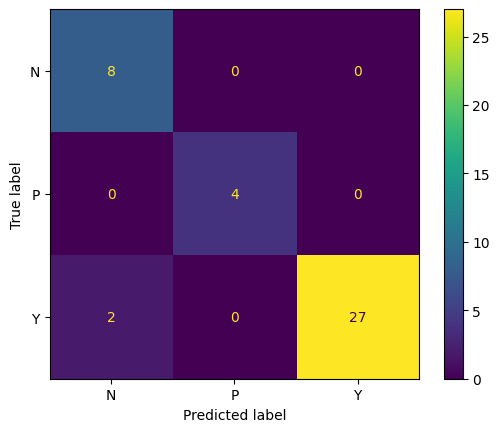

In [ ]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
print(cm)

cn=df['CLASS'].unique()

disp=ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test, display_labels=cn)

True Positives (TP) means the instances that were identified correctly by the model as belonging to the predicted class:

- For N (NN): 8.

- For P (PP): 4.

- For Y (YY): 27.

True Negatives (TN) means the instances that were correctly identified by the model as not belonging to the predicted class:

- For N (PP + YY): 31.

- For P (NN + YY): 35.

- For Y (NN + PP): 12.

False Positives (FP) means the instances that were incorrectly identified by the model as belonging to the predicted class:

- For N (PN + YN): 2.

- For P (NP + YP): 0.

- For Y (NY + PY): 0.

False Negatives (FN) means the instances that were incorrectly identified by the model as not belonging to the predicted class:

- For N (NP + NY): 0.

- For P (PN + PY): 0.

- For Y (YN + YP): 0.

#####Building decision tree model

This tree starts with HbA1c as the root feature, splitting samples based on entropy. The next splits use features like Chol (Cholesterol), LDL (Low-Density Lipoprotein), VLDL (Very Low-Density Lipoprotein), BMI (Body Mass Index), and Cr (Creatinine Ratio) to refine the classifications.

At each level, entropy is reduced to improve the accuracy of predictions. The final splits lead to leaf nodes, which classify samples as Non-Diabetic (N), Diabetic (Y), or Predict-Diabetic (P) based on the majority class in each node. This structure ensures precise and reliable classifications.

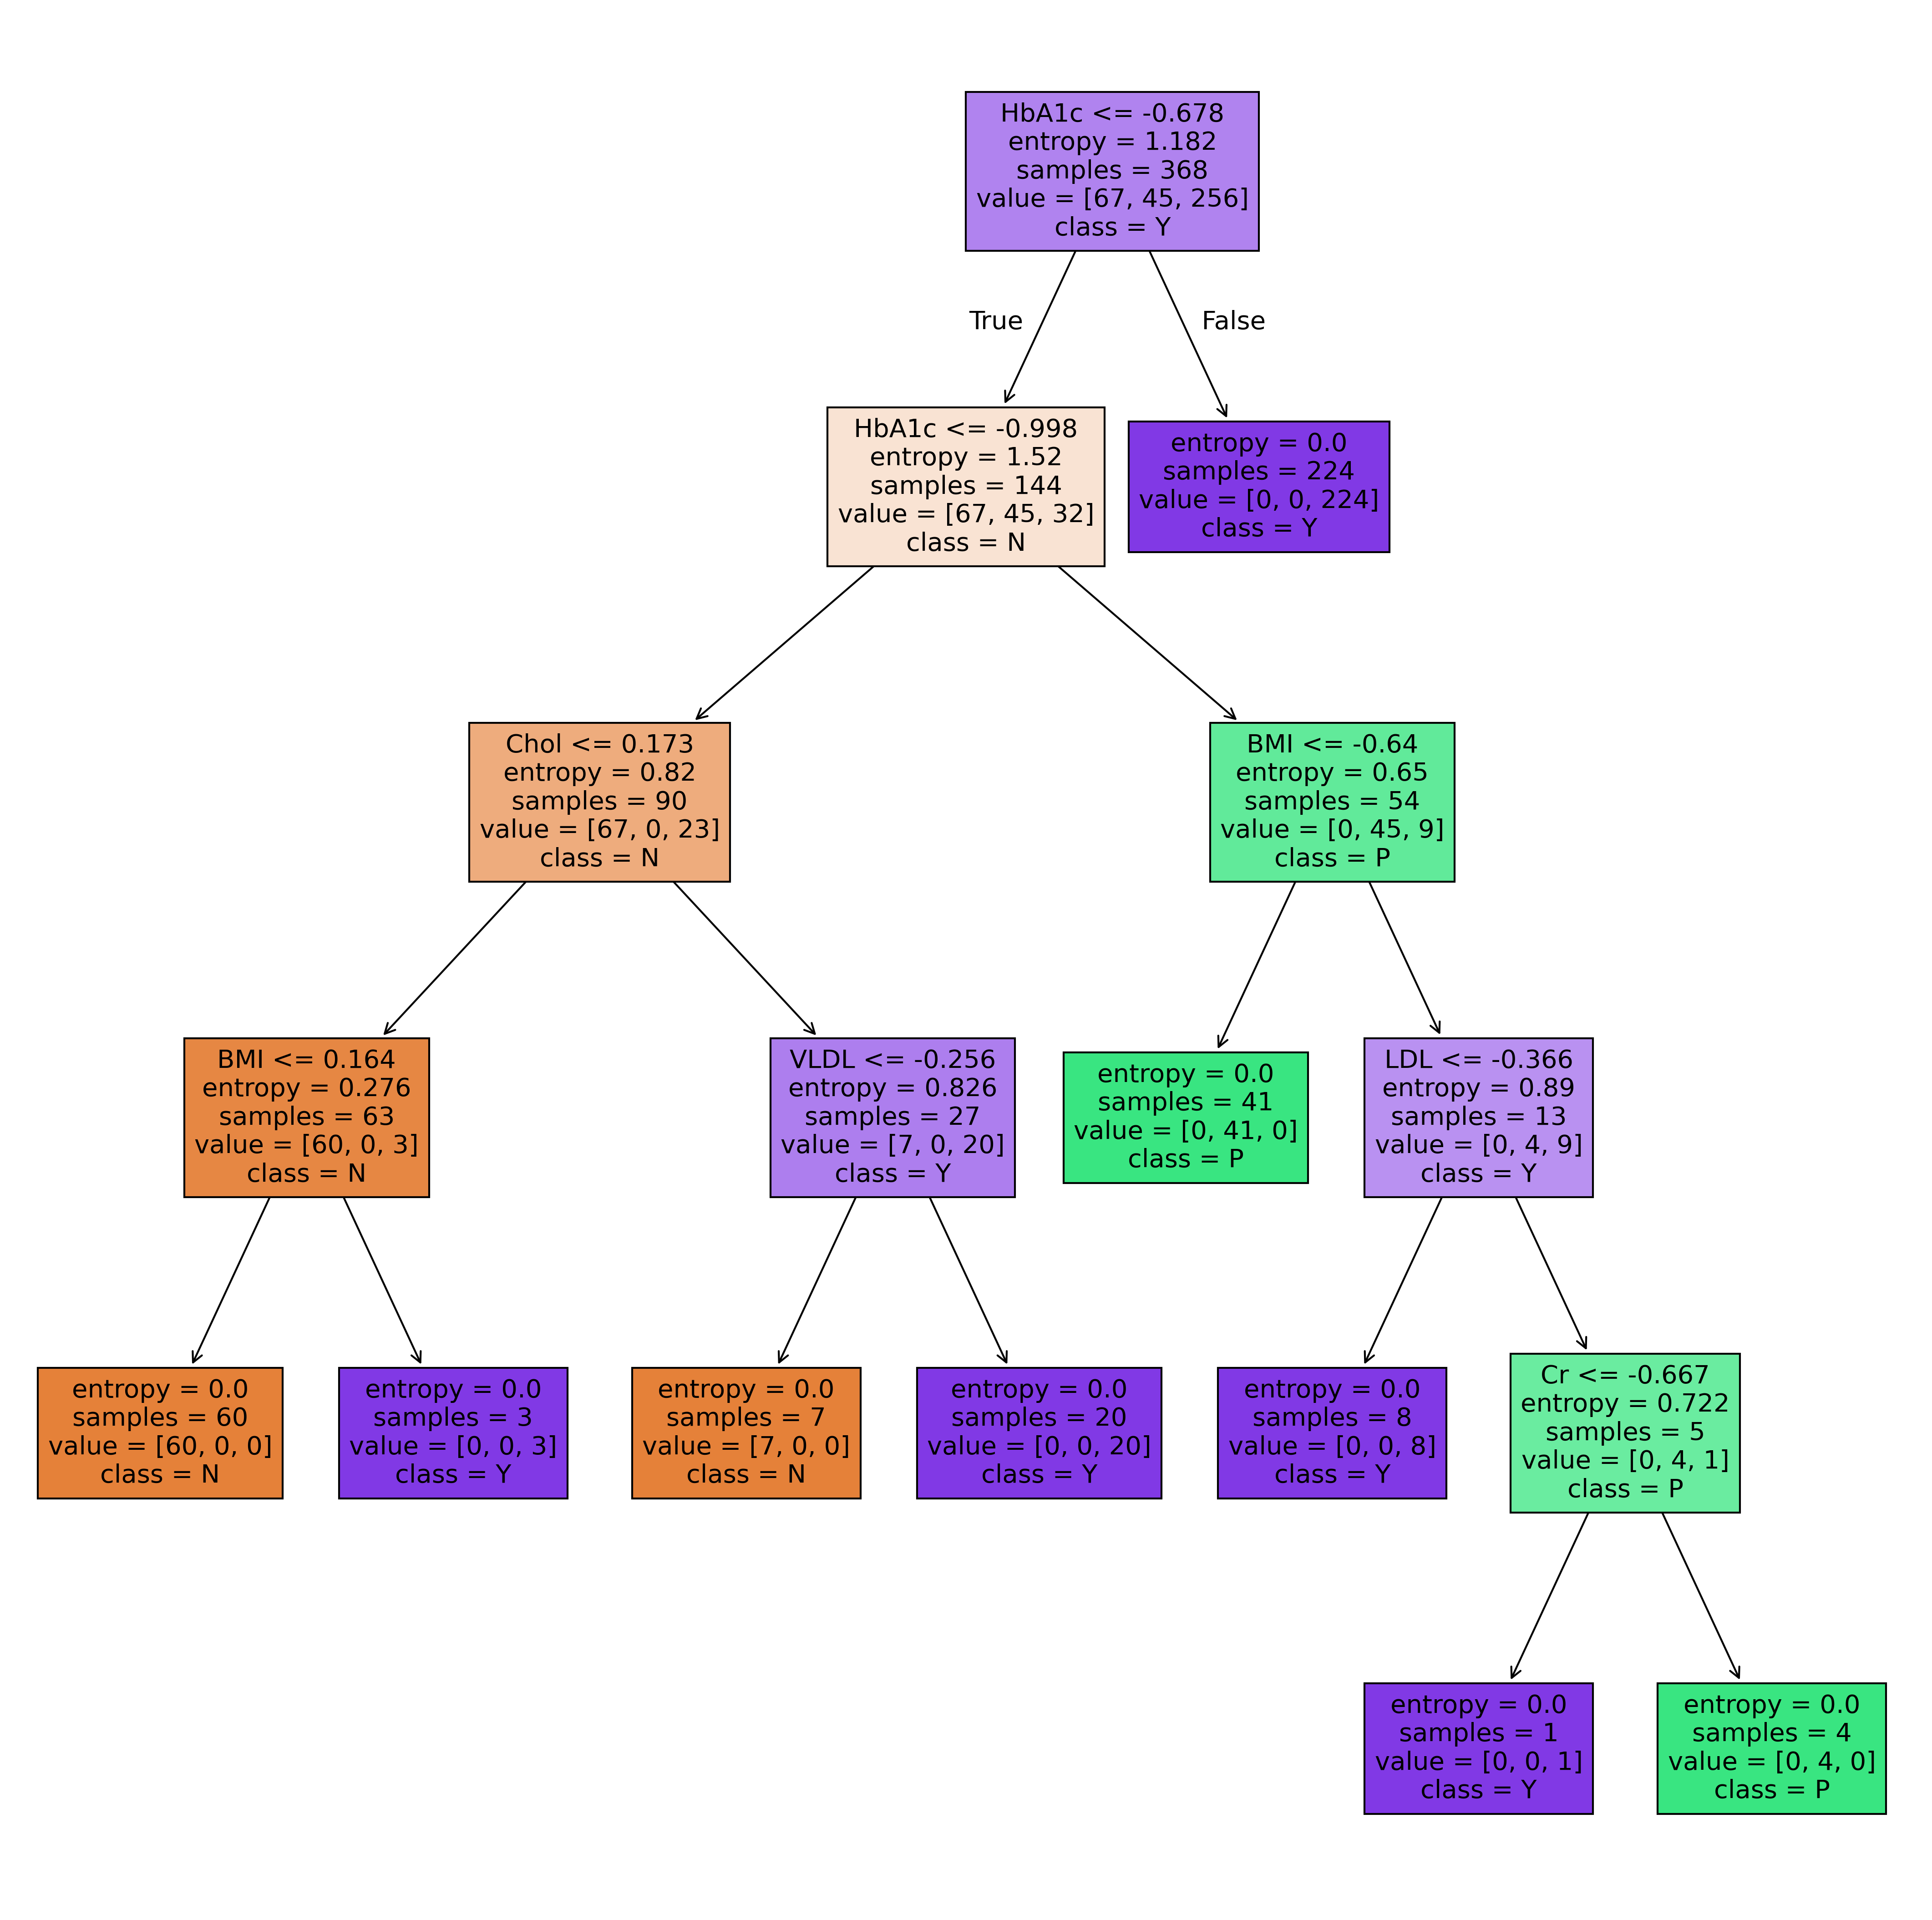

In [ ]:
from sklearn import tree

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(18,18),dpi=300)

tree.plot_tree(clf,feature_names=fn,class_names=cn,filled=True);

fig.savefig('decision_tree_visualization4.png')

####Data spliting: %80 Training, %20 test

x_train: Feature set for training, comprising 80% of the dataset.

x_test: Feature set for testing, comprising 20% of the dataset.

y_train: Target set for training, corresponding to 80% of the dataset.

y_test: Target set for testing, corresponding to 20% of the dataset.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

#####Build the decision tree model

In [ ]:
clf= DecisionTreeClassifier(criterion="entropy") #changing the selection measure to IG (entropy)
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

#####Accuracy

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9634146341463414


#####Confusion matrix

[[11  0  0]
 [ 0 12  1]
 [ 2  0 56]]


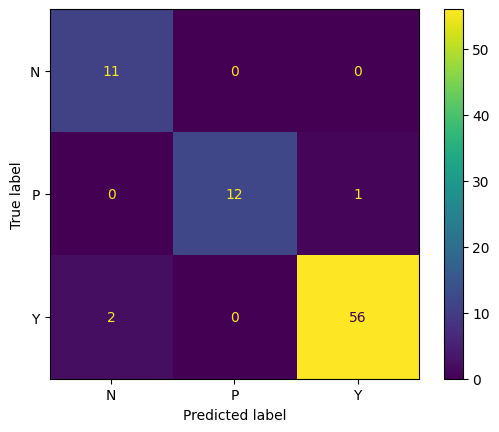

In [ ]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
print(cm)

cn=df['CLASS'].unique()

disp=ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test, display_labels=cn)

True Positives (TP) means the instances that were identified correctly by the model as belonging to the predicted class:

- For N (NN): 11.

- For P (PP): 12.

- For Y (YY): 56.

True Negatives (TN) means the instances that were correctly identified by the model as not belonging to the predicted class:

- For N (PP + YY): 68.

- For P (NN + YY): 67.

- For Y (NN + PP): 23.

False Positives (FP) means the instances that were incorrectly identified by the model as belonging to the predicted class:

- For N (PN + YN): 2.

- For P (NP + YP): 1.

- For Y (NY + PY): 0.

False Negatives (FN) means the instances that were incorrectly identified by the model as not belonging to the predicted class:

- For N (NP + NY): 0.

- For P (PN + PY): 1.

- For Y (YN + YP): 2.

#####Building decision tree model

This decision tree starts with HbA1c as the root feature, splitting samples based on its values. The next splits utilize features like Chol (Cholesterol), BMI (Body Mass Index), and VLDL (Very Low-Density Lipoprotein) to refine the classifications further.

At each level, the splitting process reduces entropy, improving the certainty of predictions. The final splits lead to leaf nodes, classifying samples as Non-Diabetic (N), Diabetic (Y), or Predict-Diabetic (P) based on the majority class in each node. This structure ensures precise and reliable classifications.


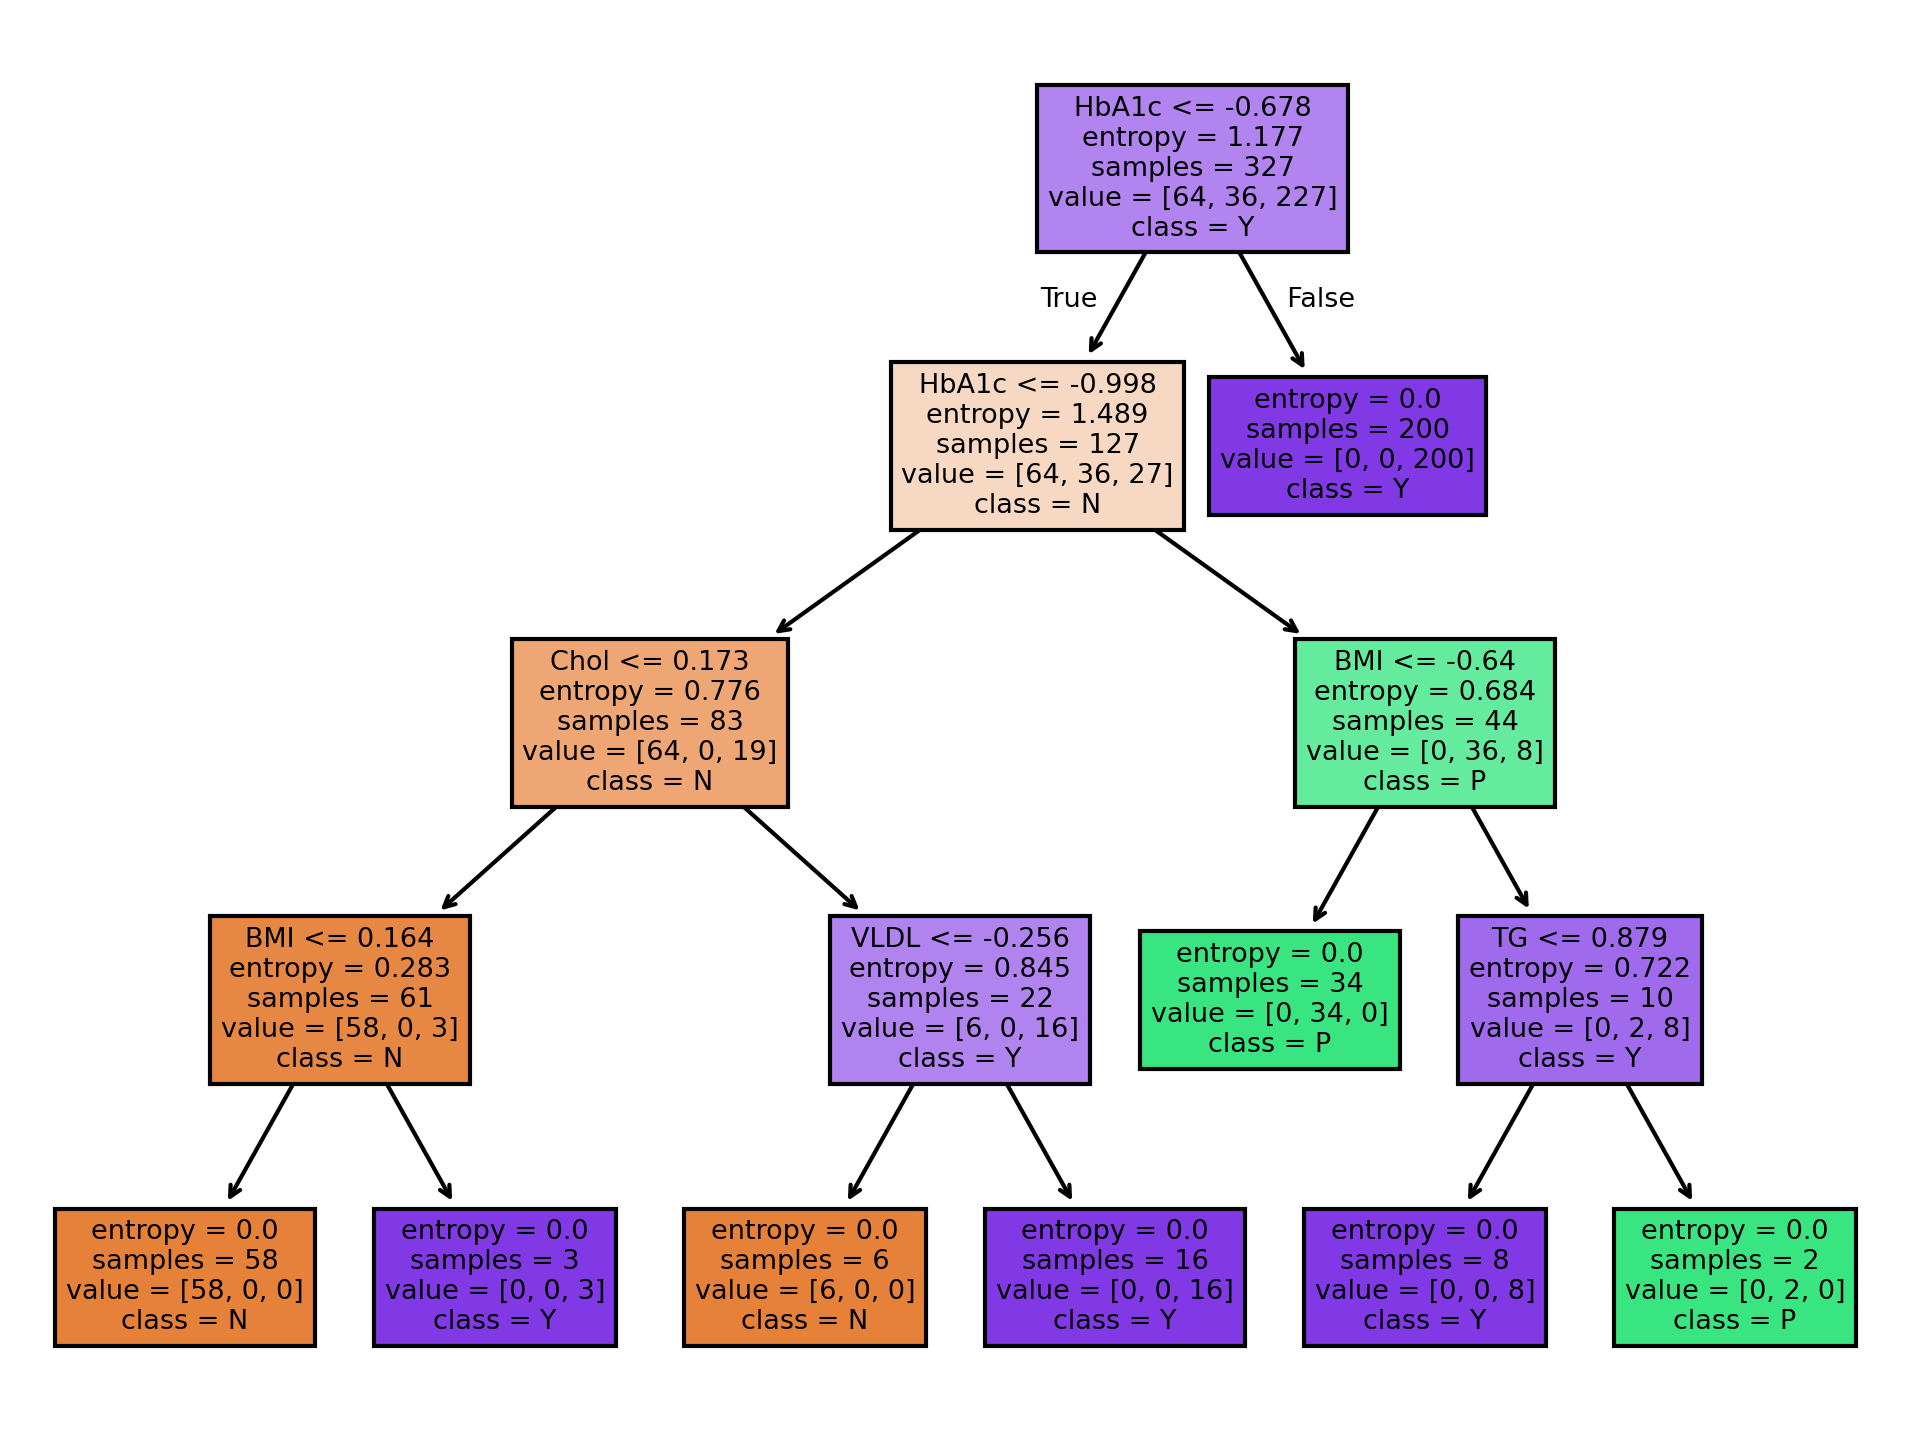

In [ ]:
from sklearn import tree

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,6),dpi=300)

tree.plot_tree(clf,feature_names=fn,class_names=cn,filled=True);

fig.savefig('decision_tree_visualization5.png')

####Data spliting: %70 Training, %30 test

x_train: Feature set for training, comprising 70% of the dataset.

x_test: Feature set for testing, comprising 30% of the dataset.

y_train: Target set for training, corresponding to 70% of the dataset.

y_test: Target set for testing, corresponding to 30% of the dataset.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

#####Build the decision tree model

In [ ]:
clf= DecisionTreeClassifier(criterion="entropy") #changing the selection measure to IG (entropy)
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

#####Accuracy

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.975609756097561


#####Confusion matrix

[[18  0  0]
 [ 0 16  1]
 [ 2  0 86]]


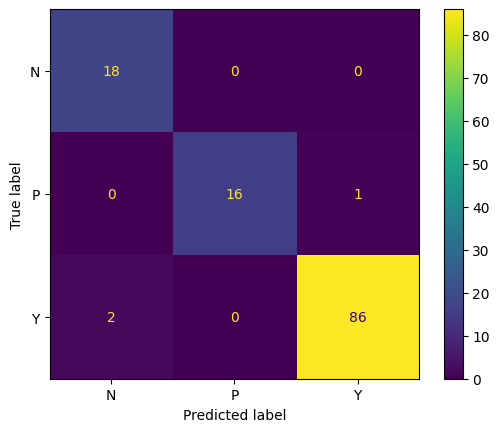

In [ ]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
print(cm)

cn=df['CLASS'].unique()

disp=ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test, display_labels=cn)

True Positives (TP) means the instances that were identified correctly by the model as belonging to the predicted class:

- For N (NN): 18.

- For P (PP): 16.

- For Y (YY): 85.

True Negatives (TN) means the instances that were correctly identified by the model as not belonging to the predicted class:

- For N (PP + YY): 101.

- For P (NN + YY): 103.

- For Y (NN + PP): 34.

False Positives (FP) means the instances that were incorrectly identified by the model as belonging to the predicted class:

- For N (PN + YN): 2.

- For P (NP + YP): 0.

- For Y (NY + PY): 1

False Negatives (FN) means the instances that were incorrectly identified by the model as not belonging to the predicted class:

- For N (NP + NY): 0.

- For P (PN + PY): 1.

- For Y (YN + YP): 2.

#####Building decision tree model

This decision tree starts with HbA1c as the root feature, splitting samples based on entropy to identify significant differences in outcomes. Key features such as Chol (Cholesterol), BMI (Body Mass Index), VLDL (Very Low-Density Lipoprotein), and LDL (Low-Density Lipoprotein) are used in subsequent splits to refine the predictions.

At each level, the entropy is reduced, improving the certainty of classifications. The final splits lead to leaf nodes, which classify samples as Non-Diabetic (N), Diabetic (Y), or Predict-Diabetic (P) based on the majority class in each node.


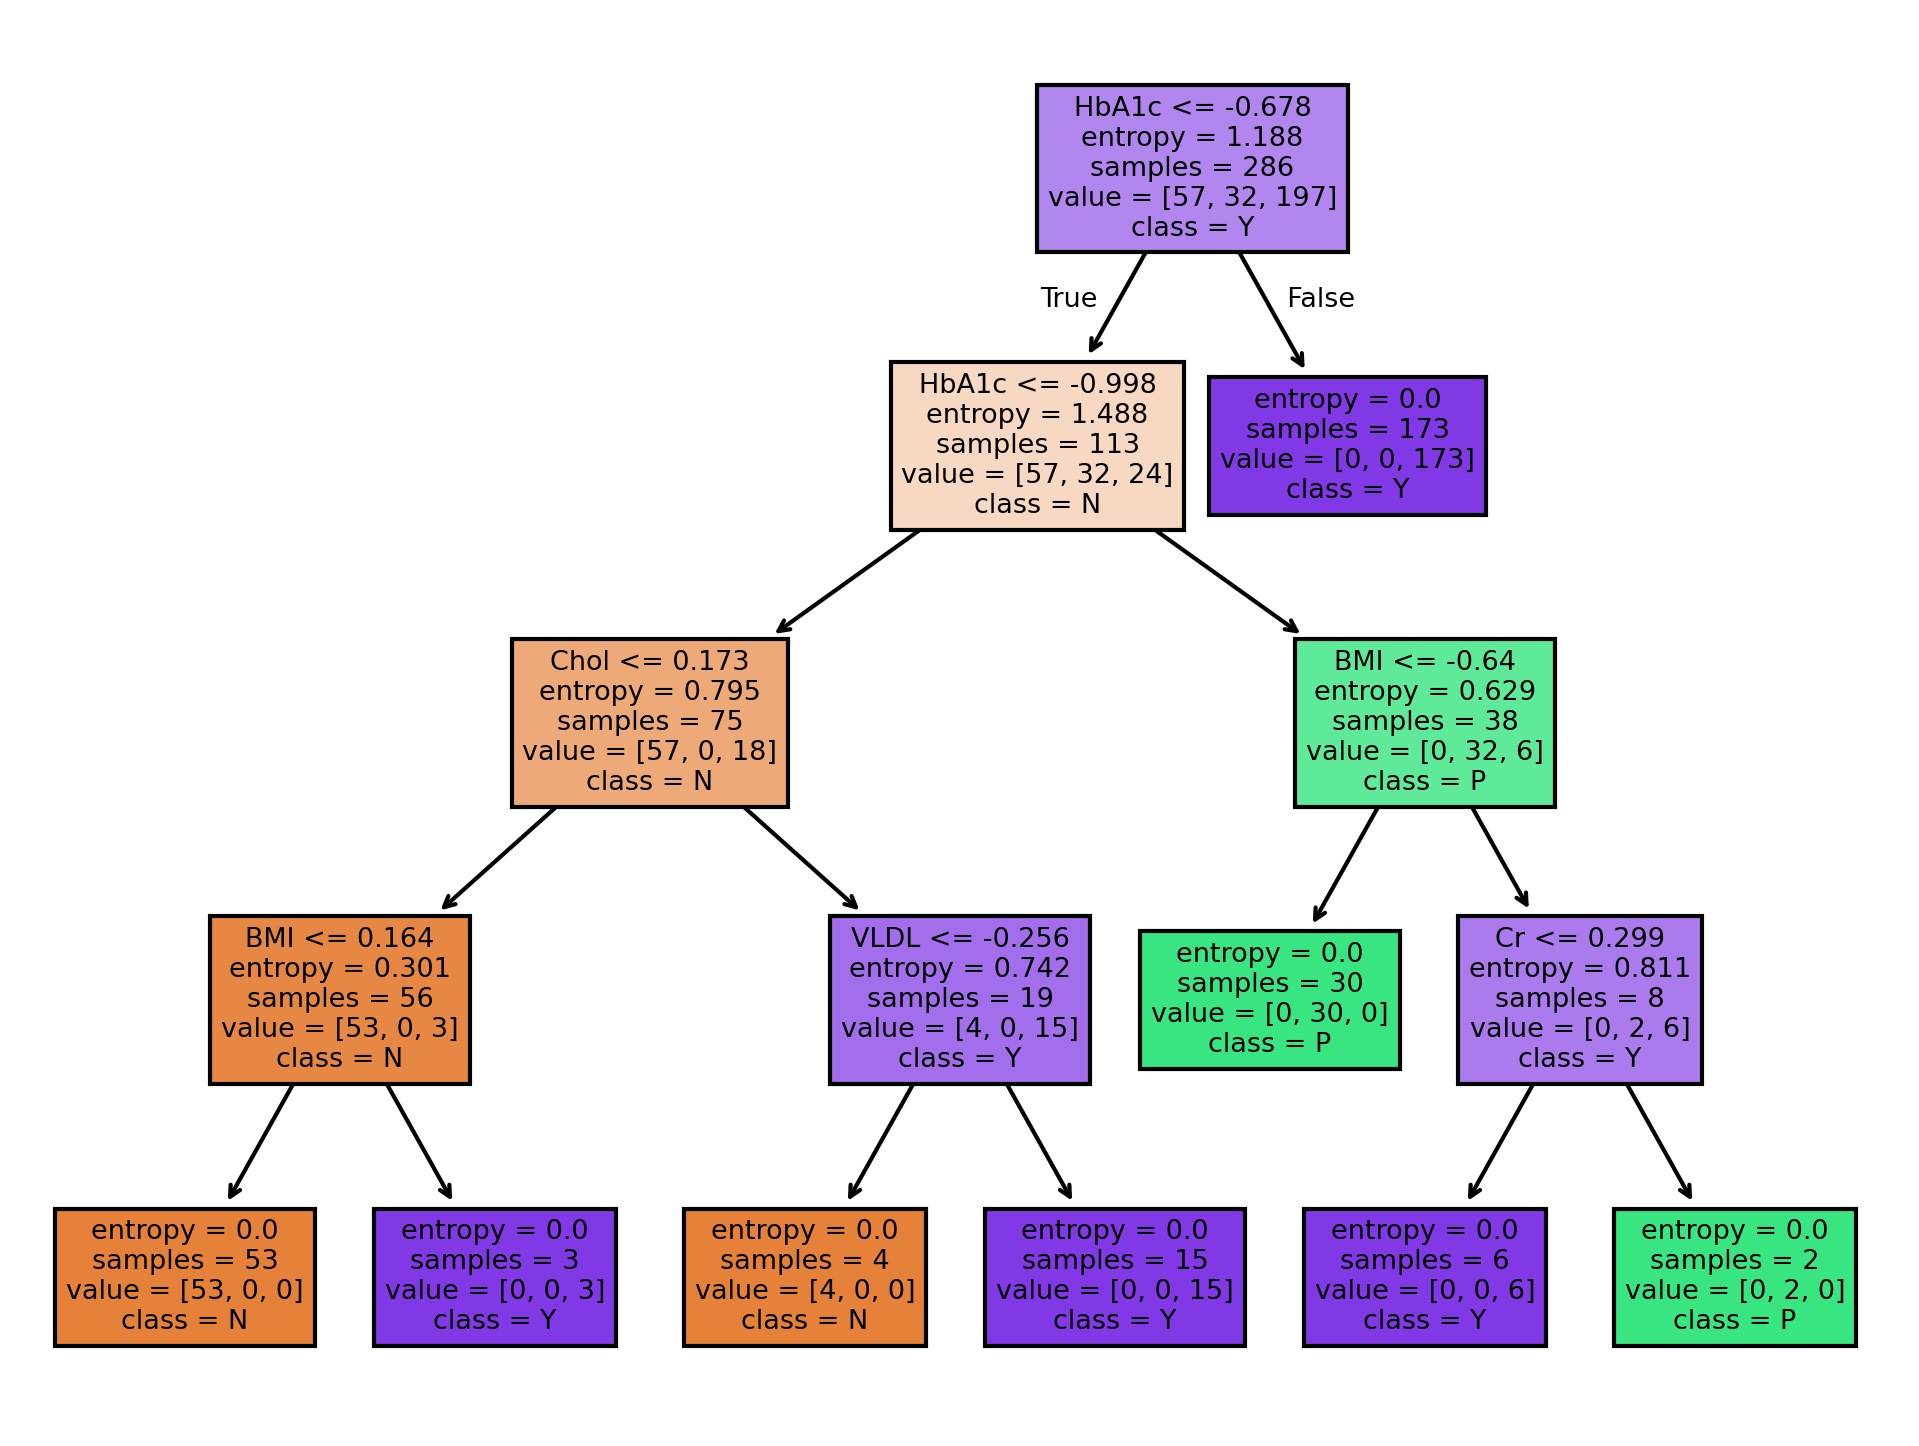

In [ ]:
from sklearn import tree

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,6),dpi=300)

tree.plot_tree(clf,feature_names=fn,class_names=cn,filled=True);

fig.savefig('decision_tree_visualization6.png')

####Evaluate the models of IG(entropy)

In [ ]:
from IPython.display import display, HTML

# Data for the table
data = {
    "": ["Accuracy"],
    "70% Training, 30% Testing": [0.975609756097561],
    "80% Training, 20% Testing": [0.9634146341463414],
    "90% Training, 10% Testing": [0.9512195121951219],
}

# Create a DataFrame
d = pd.DataFrame(data)

# Generate HTML code for the table
html_table = d.to_html(index=False)

# Display the HTML table
display(HTML(html_table))

,"70% Training, 30% Testing","80% Training, 20% Testing","90% Training, 10% Testing"
Accuracy,0.97561,0.963415,0.95122


Among these partitioning strategies, the model trained on the 70% training set and 30% testing achieved the highest accuracy (0.975 or 97.5%), followed by the model trained on the 80% training set and 20% testing set (0.963 or 96.3%), and finally the model trained on the 90% training set and 10% testing set with an accuracy of (0.951 or 95.1%).

A larger test size reduces the training data, potentially lowering model performance. Conversely, a smaller test size might lead to overfitting, where the model performs well on the test set but poorly on new data. Balancing the training and test sets is crucial for ensuring good generalization. In this case, a 30% test size offers the best balance, resulting in the highest accuracy.

###The best model between Gini index and IG(entropy)

After evaluating each measure and picking the data splitting that construct the best model for each meature, which was 70% training 30% testing for both Gini index and IG(entropy). Now we compare between these two models accuracy.

In [ ]:
## from IPython.display import display, HTML

# Data for the table
data = {
    "": ["Accuracy"],
    "IG(entropy)": [0.975609756097561],
    "Gini index": [0.975609756097561],
}

# Create a DataFrame
d = pd.DataFrame(data)

# Generate HTML code for the table
html_table = d.to_html(index=False)

# Display the HTML table
display(HTML(html_table))

,IG(entropy),Gini index
Accuracy,0.97561,0.97561


**Accuracy and Error Rate:** Both the Gini index and Index IG(entropy) models provide identical accuracy (0.975 or 97.5%), indicating that both models classification performance is equally well.

therefore, the error rates for both models are also the same, with an error rate of 2.5% (0.025). A lower error rate indicates fewer misclassifications.

Given that both models yield the same performance metrics, it can be concluded that there is no significant difference in overall performance between the Gini Index and IG(entropy) models in this case. Thus, either model can be considered reliable for the task, offering similar high accuracy.

In [ ]:
%%html
    <style type="text/css">
        .tg {
            border-collapse: collapse;
            border-spacing: 0;
            width: 100%;
        }
        .tg td, .tg th {
            border: 1px solid black;
            font-family: Arial, sans-serif;
            font-size: 14px;
            overflow: hidden;
            padding: 10px 5px;
            word-break: normal;
            text-align: center;
            vertical-align: middle;
        }


    </style>
</head>
<body>
    <table class="tg">
        <tr>
            <th colspan="2">90% training set 10% testing set</th>
            <th colspan="2">80% training set 20% testing set</th>
            <th colspan="2">70% training set 30% testing set</th>
        </tr>
        <tr>
            <th>IG</th>
            <th>Gini Index</th>
            <th>IG</th>
            <th>Gini Index</th>
            <th>IG</th>
            <th>Gini Index</th>
        </tr>
        <tr>
            <td>0.9512</td>
            <td>0.9512</td>
            <td>0.9634</td>
            <td>0.9512</td>
            <td>0.9756</td>
            <td>0.9756</td>
        </tr>
    </table>
</body>
</html>



## Clustering

### K-means clustering

K-means clustering is an unsupervised machine learning algorithm used to partition a dataset into K distinct clusters based on their similarities. It assigns each data point to the nearest cluster centroid and iteratively updates the centroids to minimize the within-cluster sum of squared distances.

Firstly we are going to remove the class labels and any columns that could interfere with the clustering process because clustring is an unsopervised learning method which dosen't  have a predifend class.

In [ ]:
# Remove the class labels.
# Extract the features (excluding the target variable, if any).
df = pd.read_csv("Dataset/Processed_dataset.csv")
#drop the class feature which is in coulmn1, the id feature in coulmn2 and No_pation feature in coulms 12
features = df.drop(df.columns[[0,1,11]], axis=1)

**Since** the K-means algorithm is sensitive to feature scales, we begin by scaling the feature to have the same unnite.

In [ ]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
# Scale the variable if needed.
# Use StandardScaler to scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
# Display the scaled DataFrame
print("\nScaled DataFrame:")
print(df_scaled.head())


Scaled DataFrame:
        BMI     HbA1c        TG      VLDL      Chol      Urea       LDL  \
0 -1.342721 -1.272532 -0.159408 -0.423868 -0.052568 -0.335711 -0.056097   
1 -1.342721 -1.037481 -1.113520 -1.335101  0.142889  1.871777 -0.649726   
2 -0.719723 -1.390058 -0.371433 -0.423868  0.142889 -1.071540  0.141779   
3 -1.135055 -1.390058 -0.901495  0.487365 -0.248024  1.283113  1.427975   
4 -1.135055 -1.390058  0.900718  0.715173 -1.909403 -0.262128  1.131161   

         Cr       HDL  
0 -0.786411  0.803095  
1 -0.684107 -0.984961  
2 -0.530652  0.803095  
3  1.464265  1.995133  
4  2.026934 -0.984961  


We apply clustering using three different sizes of K, which are 2,4,6.

The selection was based on different numbers of stages in the low, medium, and high ranges. We select to start with lower size 2 because it is the number that is repeated in the stages of diabetes in the research, and in this way we hope to cover the best possible results and clustering results.

K=2 because it is the most common and general number for clustering in the field of diabetes, according to the number of diabetes stages by SDCPG systems.

The result of follwing code shows the cordinates of each cluster when K=2 ,4 and 6 follwing up with the assign cluster to each data point.

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
#5) Build the K-means model
# Set a seed for random number generation
np.random.seed(42)

# Define different values of K
k_values = [2, 4, 6]  # Example: using 2, 4, and 6 clusters

# Iterate over each value of K
for k in k_values:
    # Run K-means clustering with the current value of K
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_result = kmeans.fit(df_scaled)

    # Print the clustering result for the current value of K
    print(f"Cluster Centers (K={k}):")
    print(kmeans_result.cluster_centers_)
    print("\nCluster Labels:")
    print(kmeans_result.labels_)
    print("\n")

Cluster Centers (K=2):
[[-0.36717906 -0.33601509 -0.51901877 -0.57842042 -0.32007462  0.02643256
  -0.06463305  0.03422327  0.08904135]
 [ 0.6079913   0.55638862  0.85941419  0.95777407  0.52999369 -0.0437682
   0.10702225 -0.0566684  -0.1474386 ]]

Cluster Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0
 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1
 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1
 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1
 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0
 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 

### Evaluation of clustering

We implemented two evaluation techniques: the Silhouette Coefficient, which helps us understand how well each data point fits within its cluster, and the Elbow Method, which identifies the optimal number of clusters by analyzing the total within-cluster sum of squares(WSS). These methods provided valuable insights into the effectiveness of our clustering results from the previous cell.

#### 1-Silhouette coefficient

The first evaluation method we used is the Silhouette Coefficient, as it measures how similar an object is to its own cluster compared to other clusters. Illustrated by a dotted line, it is a critical metric for assessing clustering quality, with a higher value indicating a more appropriate choice of the number of clusters, K.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


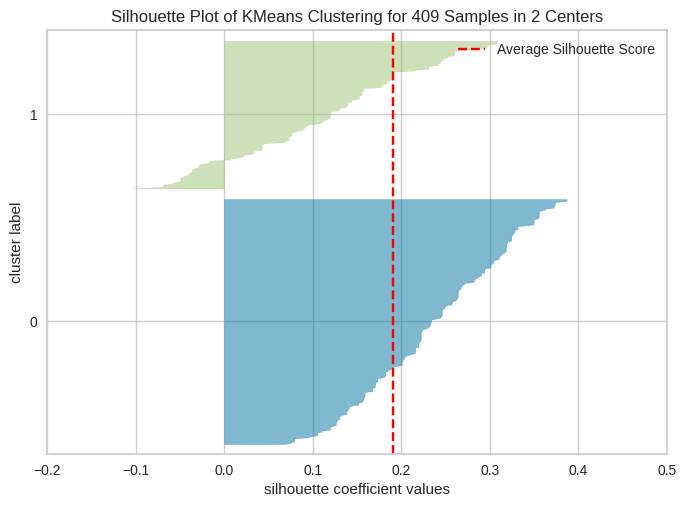

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


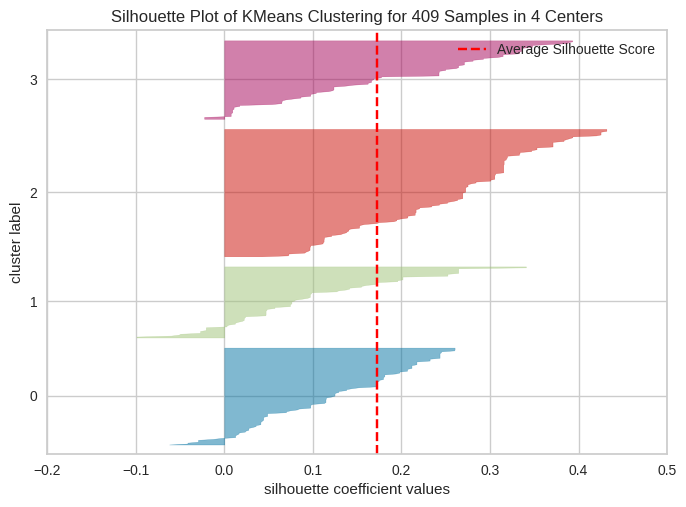

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


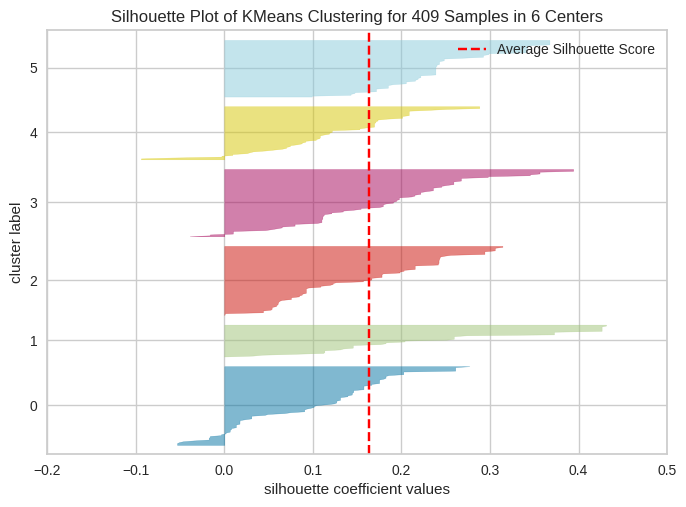

In [ ]:
# Visual the model using (SilhouetteVisualizer)
%pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

# Define different values of K
k_values = [2, 4, 6]  # Example: using 2, 4, and 6 clusters

# Iterate over each value of K
for k in k_values:
    # Run K-means clustering with the current value of K
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_result = kmeans.fit(df_scaled)

    # Visualize the clustering model with SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(df_scaled)
    visualizer.show()

After analyzing the graphs, we computed the Silhouette Coefficient for each value of K to evaluate the quality of the clusters:

* When K=2 silhouette coefficient value = 0.1498

*  When K=4 silhouette coefficient value = 0.1369
*   When K=6 silhouette coefficient value =0.1318


This means that the best number of clusters is K = 2, as it corresponds to the highest silhouette coefficient value.

####2-Elbow method

The second evaluation method used is the Elbow Method, where the optimal number of clusters is identified at the "elbow" point on the curve, where the rate of variance reduction slows down, indicating the ideal K value.

WCSS for k=1: 3681.0000000000014
WCSS for k=2: 3025.3632113979993
WCSS for k=3: 2637.3222298647
WCSS for k=4: 2375.4722672362336
WCSS for k=5: 2161.797544823227
WCSS for k=6: 2030.2956679150598
WCSS for k=7: 1919.6618039557775
WCSS for k=8: 1846.1823885844021
WCSS for k=9: 1745.3984993116308
WCSS for k=10: 1615.3247162929122


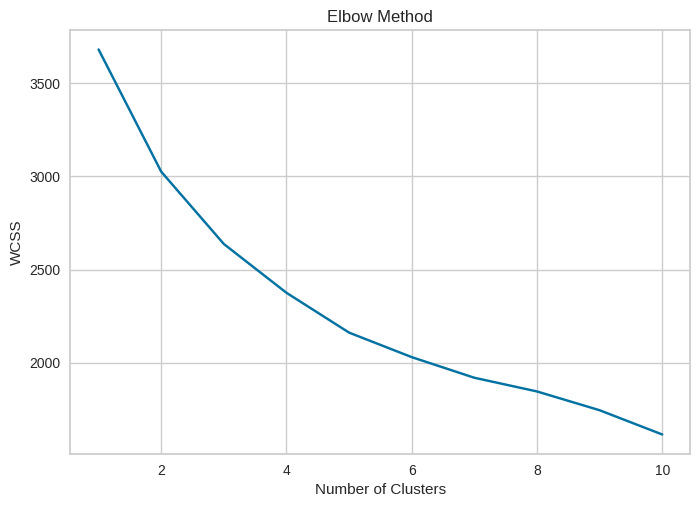

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Calculate the total within-cluster sum of squares (WCSS) for different values of k
wcss = []
for i in range(1, 11):  # Try different values of k from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

    # Print the WCSS value for the current value of k
    print(f"WCSS for k={i}: {kmeans.inertia_}")

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

After visually displaying the graph of the total within-cluster sum of squares (WSS) with respect to K, we observe that the turning point occurs at K = 2, where the rate of decrease in WSS begins to slow down. This indicates that the optimal number of clusters is 2.

In [ ]:
 %%html
 <style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky"></th>
    <th class="tg-0pky">K=2</th>
    <th class="tg-0pky">K=4</th>
    <th class="tg-0pky">K=6</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">Average Silhouette width</td>
    <td class="tg-0pky"> 0.1498</td>
    <td class="tg-0pky"> 0.1369</td>
    <td class="tg-0pky">0.1318</td>
  </tr>
  <tr>
    <td class="tg-0pky">Total within-cluster sum of square</td>
    <td class="tg-0pky">3025.3632113979993</td>
    <td class="tg-0pky">2375.4722672362336</td>
    <td class="tg-0pky">2030.2956679150598</td>
  </tr>
</tbody>
</table>

,K=2,K=4,K=6
Average Silhouette width,0.1498,0.1369,0.1318
Total within-cluster sum of square,3025.3632113979993,2375.4722672362336,2030.2956679150598


At the end based on majority rule we can see that the optimal number of clusters is 2. Where it has the highest average silhouette width, indicating well-separated clusters, As well as having the elbow point on 3025.36 which intersect with k=2 indicates that the optimal number of cluster is 2.

## 7.Findings

We selected a dataset representing patients' data to predict the probability of having diabetes. This prediction helps individuals take appropriate preventive measures to improve their health and well-being. To ensure efficient and accurate results, we applied several preprocessing techniques to enhance the dataset's quality and performance.

Various plotting methods, such as pie charts, box plots, scatter plots, histograms, and bar plots, were used to visualize the data. Each plot illustrated different aspects of the dataset, helping us understand feature distributions and identify areas that required preprocessing. Based on these visualizations, we identified and removed any null, missing, duplicated, or outlier values that could negatively impact the results. The data was also cleaned and standardized by removing extra spaces from string values and capitalizing characters in categorical columns.

We also applied data transformation techniques like normalization, encoding, aggregation, and discretization to certain attributes, ensuring all features had equal weight and facilitating more effective data handling during data mining tasks. Since the dataset had an imbalanced class distribution (with the class labels "Y", "N", and "P"), we used data balancing techniques to achieve a more even distribution across the classes.

For the classification task, we used the decision tree method to construct our model. The model was evaluated using two attribute selection measures: IG (entropy) and the Gini Index. We tested three different partitions of training and testing data to determine the best results for model construction and evaluation. The partitions were:

* 70% Training Set, 30% Testing Set
* 80% Training Set, 20% Testing Set
* 90% Training Set, 10% Testing Set

The results were as follows:

Gini Index:

* 70% Training data, 30% Test data, accuracy = 97.56%
* 80% Training data, 20% Test data, accuracy = 95.12%
* 90% Training data, 10% Test data, accuracy = 95.12%

IG (entropy):

* 70% Training data, 30% Test data, accuracy = 97.56%
* 80% Training data, 20% Test data, accuracy = 96.34%
* 90% Training data, 10% Test data, accuracy = 95.12%

After comparing the accuracy results of the Gini Index and IG (entropy) for all the partitions, we concluded that both models (Gini Index and IG (entropy)) achieved the best accuracy rate with the 70% Training data, 30% Test data partition. Therefore, these models are the most reliable for classifying the majority of the diabetes dataset tuples correctly.


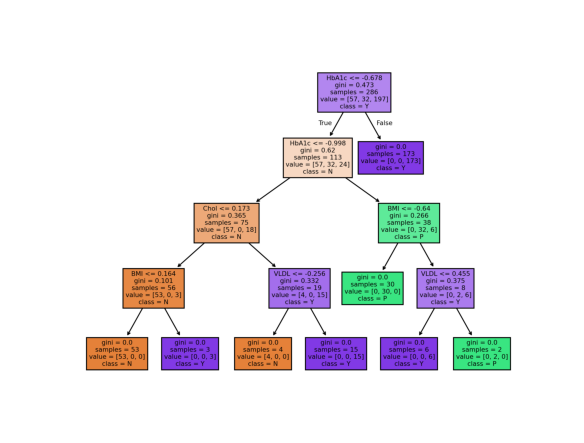

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("decision_tree_visualization3.png")
plt.imshow(img)
plt.axis('off')
plt.show()

Since both models are the same, we will explain the result from the tree plot on :

* The root of the tree is the HbA1c attribute, which has the minimum Gini index, making it the best split for partitioning the data into a binary subtree. The first node represents tuples with HbA1c ≤ -0.678, and the second represents tuples with HbA1c > -0.678.

* From the second node (HbA1c > -0.678), we can observe that all tuples are classified as Y (Positive), resulting in a Gini index of 0.0 due to complete purity.

* For the first node (HbA1c ≤ -0.678), further partitioning is required, and the next split is based on HbA1c ≤ -0.998, which minimizes the Gini index within this subset:
        
* HbA1c ≤ -0.998 leads to another split based on the Chol (Cholesterol) attribute. This partition creates two subtrees:
            
* For Chol ≤ 0.173 The majority of tuples in this branch are classified as N (Negative), with further splitting based on BMI ≤ 0.164.

* For BMI ≤ 0.164, all tuples are classified as N, resulting in complete purity (Gini = 0.0).
* For BMI > 0.164, all tuples are classified as Y, also achieving complete purity (Gini = 0.0).
            
* For Chol > 0.173 Most tuples in this branch are classified as N, though some are classified as Y.

* For the middle branch (HbA1c ≤ -0.678 but > -0.998), the next split is based on BMI ≤ -0.64, which further partitions the data:

* BMI ≤ -0.64 leads to a majority classification of P (Probable).
* Further partitioning based on VLDL ≤ 0.455 results in final classifications of Y or P, depending on the values.


For Clustering, we used K-means algorithm with 3 different K to find the optimal number
of clusters, we calculated the average silhouette width for each K and the total within-cluster sum of squares (WSS) with respect to K, the results were as follows:
Silhouette coefficient:
* K = 2 silhouette coefficient value = 0.1498
* K = 4 silhouette coefficient value = 0.1369
* K = 6 silhouette coefficient value = 0.1318

Total within-cluster sum of squares (WSS):
* K = 2 Total within-cluster sum of squares = 3025.36
* K = 4 Total within-cluster sum of squares = 2375.47
* K = 6 Total within-cluster sum of squares = 2030 .29                                        

After comparing the silhouette coefficient and total within-cluster sum of squares results for ( k=2, k=4, k=6), we concluded that K=2 is the best choice for our clustering model based on the metrics we've analyzed(WSS, Average Sihouette Score, Visualization of K-mean).Therefore, this clustering model is the most reliable for identifying patterns and grouping the majority of the diabetes dataset tuples into meaningful clusters, helping to uncover insights about similar characteristics within the data.

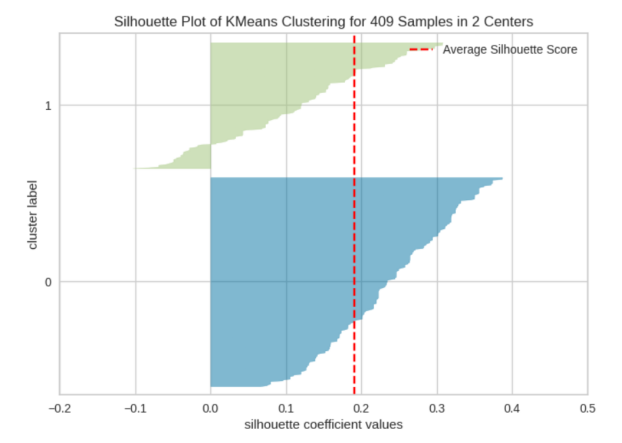

In [ ]:
img = mpimg.imread("Silhouette coefficient.png")
plt.imshow(img)
plt.axis('off')
plt.show()

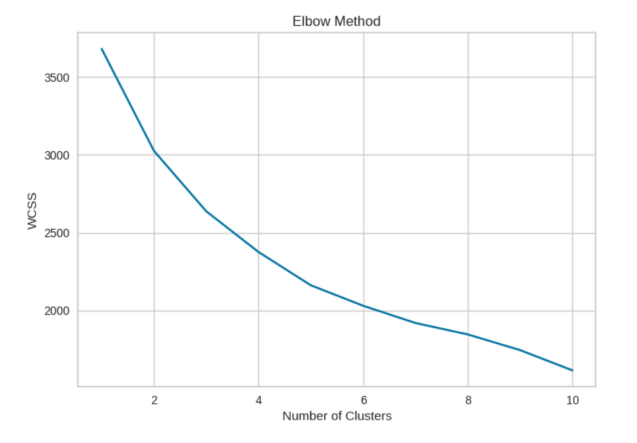

In [ ]:
img = mpimg.imread("Elbow method.png")
plt.imshow(img)
plt.axis('off')
plt.show()

Finally, both models are helpful for predicting whether a person may have diabetes and helped us to reach our goal, which is helping people to take precautions if they are at risk of developing diabetes or not. However, since our data contains a class label 'CLASS', this makes supervised learning models (classification) more accurate and suitable to apply for out model than unsupervised learning models (clustering), as the expected output is known beforehand. This allows us to effectively use the class label attribute for better predictions.

## 8.References

* [1] "Diabetes," American Diabetes Association. [Online]. Available: https://www.diabetes.org/diabetes. [Accessed: Nov. 29, 2024].

* [2] "Diabetes," World Health Organization (WHO). [Online]. Available: https://www.who.int/news-room/fact-sheets/detail/diabetes. [Accessed: Nov. 29, 2024].

* [3] "Diabetes and cardiovascular complications," National Institutes of Health (NIH). [Online]. Available: https://www.nhlbi.nih.gov/health-topics/diabetes-and-heart-disease. [Accessed: Nov. 29, 2024].